# UK Car Accidents Analysis

**Coding 3 - Final Project**

*Sabina Umarova - Ersan Kucukoglu*

*31th March 2022*

## Introduction
In this project we are going to analyze  U.K car accidents data from year 2010 to 2015. We are going to respond three analytical questions by exploring the pattern of accident conditions across the country, and to see if there is any relationships between environmental conditions and the number of accidents. For the second question, we are going to use Weather API data to see the relationship between accidents and weather in London, 2015.

The data comes from governemnt website www.data.gov.uk. UK police forces collect the accidents data using the form called Stats19. A supporting document to understand each numerical category in datasets is provided on the www.data.gov.uk website as well. 

**Analytical Questions:**
1. How do number of accidents differs for various environmental conditions (road type, light conditions, weather conditions)?
2. Do people become more careful on the roads with age?
3. What are the patterns between number of accidents and weather conditions?


**The data consists of three main tables:**

- Accidents — 32 variables, detailing the location, time, date, lighting, road surface conditions, number of causalities, road type and other variables. 
- Casualties — Linked via ‘Accident Index’ to the Accidents table, the table has 15 columns, giving further detail on the casualties involved. There are 221,6720 rows.
- Vehicles — This table gives details of the vehicles involved in accidents.

### Check working directory

In [3]:
import os

In [4]:
os.getcwd()

'/Users/sabina/Downloads/accidents_python-project-main-5/code'

### Loading Packages

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import json
from datetime import datetime
import math
import csv
from geopy.geocoders import Nominatim
import geocoder
import time
import urllib.parse
import urllib.request

### Import the Data

In [68]:
#please change to your path

#accidents_raw = pd.read_csv('/Users/ersankucukoglu/Desktop/Projects/accidents_python-project/data/raw/Accidents0515.csv')
#casualties_raw = pd.read_csv('/Users/ersankucukoglu/Desktop/Projects/accidents_python-project/data/raw/Casualties0515.csv',on_bad_lines='skip')
#refDataDict = pd.read_excel('/Users/ersankucukoglu/Desktop/Projects/accidents_python-project/data/raw/Road-Accident-Safety-Data-Guide.xls',sheet_name=None)

accidents_raw = pd.read_csv('/Users/sabina/Desktop/Coding_final_project/data/raw/Accidents0515.csv')
casualties_raw = pd.read_csv('/Users/sabina/Desktop/Coding_final_project/data/raw/Casualties0515.csv',on_bad_lines='skip')
vehicles_raw = pd.read_csv('/Users/sabina/Desktop/Coding_final_project/data/raw/Vehicles0515.csv',on_bad_lines='skip')
refDataDict = pd.read_excel('/Users/sabina/Desktop/Coding_final_project/data/raw/Road-Accident-Safety-Data-Guide.xls',sheet_name=None)

## Data Cleaning

First of all, in both accidents and casualties datasets, the categorical data stored as numeric a numeric code with seperate spreadsheet detailing the meaning of each of code for each variable. In order to understand the data into readable format, it was loaded along with the dictionary into Pandas DataFrames and codes translated to values.

In [6]:
## Translate Data 

# Reference data codes
pf = refDataDict['Police Force'].set_index('code')
accidents_raw['Police_Force'] = accidents_raw['Police_Force'].apply(lambda x: pf.loc[x,'label'])

accSev = refDataDict['Accident Severity'].set_index('code')
accidents_raw['Accident_Severity'] = accidents_raw['Accident_Severity'].apply(lambda x: accSev.loc[x,'label'])

DoW = refDataDict['Day of Week'].set_index('code')
accidents_raw['Day_of_Week'] = accidents_raw['Day_of_Week'].apply(lambda x: DoW.loc[x,'label'])

RC1 = refDataDict['1st Road Class'].set_index('code')
accidents_raw['1st_Road_Class'] = accidents_raw['1st_Road_Class'].apply(lambda x: RC1.loc[x,'label'])

RT = refDataDict['Road Type'].set_index('code')
accidents_raw['Road_Type'] = accidents_raw['Road_Type'].apply(lambda x: RT.loc[x,'label'])

JD = refDataDict['Junction Detail'].set_index('code')
accidents_raw['Junction_Detail'] = accidents_raw['Junction_Detail'].apply(lambda x: JD.loc[x,'label'])

JC = refDataDict['Junction Control'].set_index('code')
accidents_raw['Junction_Control'] = accidents_raw['Junction_Control'].apply(lambda x: JC.loc[x,'label'])

PCH = refDataDict['Ped Cross - Human'].set_index('code')
accidents_raw['Pedestrian_Crossing-Human_Control'] = accidents_raw['Pedestrian_Crossing-Human_Control'].apply(lambda x: PCH.loc[x,'label'])

PCPh = refDataDict['Ped Cross - Physical'].set_index('code')
accidents_raw['Pedestrian_Crossing-Physical_Facilities'] = accidents_raw['Pedestrian_Crossing-Physical_Facilities'].apply(lambda x: PCPh.loc[x,'label'])

LC = refDataDict['Light Conditions'].set_index('code')
accidents_raw['Light_Conditions'] = accidents_raw['Light_Conditions'].apply(lambda x: LC.loc[x,'label'])

Weather = refDataDict['Weather'].set_index('code')
accidents_raw['Weather_Conditions'] = accidents_raw['Weather_Conditions'].apply(lambda x: Weather.loc[x,'label'])

RS = refDataDict['Road Surface'].set_index('code')
accidents_raw['Road_Surface_Conditions'] = accidents_raw['Road_Surface_Conditions'].apply(lambda x: RS.loc[x,'label'])

UrbRur = refDataDict['Urban Rural'].set_index('code')
accidents_raw['Urban_or_Rural_Area'] = accidents_raw['Urban_or_Rural_Area'].apply(lambda x: UrbRur.loc[x,'label'])

CasClass = refDataDict['Casualty Class'].set_index('code')
casualties_raw['Casualty_Class'] = casualties_raw['Casualty_Class'].apply(lambda x: CasClass.loc[x,'label'])

CasSex = refDataDict['Sex of Casualty'].set_index('code')
casualties_raw['Sex_of_Casualty'] = casualties_raw['Sex_of_Casualty'].apply(lambda x: CasSex.loc[x,'label'])



KeyError: 'Metropolitan Police'

#### Quick look at the accidents data:

In [7]:
nRow, nCol = accidents_raw.shape
print(f'There are {nRow} rows and {nCol} columns.')

There are 1780653 rows and 32 columns.


In [8]:
accidents_raw.head(10)

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,Metropolitan Police,Serious,1,1,04/01/2005,...,None within 50 metres,Zebra,Daylight,Raining no high winds,Wet or damp,0,0,Urban,1,E01002849
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,Metropolitan Police,Slight,1,1,05/01/2005,...,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness - lights lit,Fine no high winds,Dry,0,0,Urban,1,E01002909
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,Metropolitan Police,Slight,2,1,06/01/2005,...,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,0,0,Urban,1,E01002857
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,Metropolitan Police,Slight,1,1,07/01/2005,...,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,0,0,Urban,1,E01002840
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,Metropolitan Police,Slight,1,1,10/01/2005,...,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lighting unknown,Fine no high winds,Wet or damp,0,0,Urban,1,E01002863
5,200501BS00006,524770.0,181160.0,-0.203238,51.515540,Metropolitan Police,Slight,2,1,11/01/2005,...,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Raining no high winds,Wet or damp,6,0,Urban,1,E01002832
6,200501BS00007,524220.0,180830.0,-0.211277,51.512695,Metropolitan Police,Slight,2,1,13/01/2005,...,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,0,0,Urban,1,E01002875
7,200501BS00009,525890.0,179710.0,-0.187623,51.502260,Metropolitan Police,Slight,1,2,14/01/2005,...,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,0,0,Urban,1,E01002889
8,200501BS00010,527350.0,177650.0,-0.167342,51.483420,Metropolitan Police,Slight,2,2,15/01/2005,...,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness - lights lit,Fine no high winds,Dry,0,0,Urban,1,E01002900
9,200501BS00011,524550.0,180810.0,-0.206531,51.512443,Metropolitan Police,Slight,2,5,15/01/2005,...,None within 50 metres,Central refuge,Daylight,Fine no high winds,Dry,0,0,Urban,1,E01002875


In [138]:
#info attribute gives info about dataframe
accidents_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1780653 entries, 0 to 1780652
Data columns (total 32 columns):
 #   Column                                       Dtype  
---  ------                                       -----  
 0   Accident_Index                               object 
 1   Location_Easting_OSGR                        float64
 2   Location_Northing_OSGR                       float64
 3   Longitude                                    float64
 4   Latitude                                     float64
 5   Police_Force                                 object 
 6   Accident_Severity                            object 
 7   Number_of_Vehicles                           int64  
 8   Number_of_Casualties                         int64  
 9   Date                                         object 
 10  Day_of_Week                                  object 
 11  Time                                         object 
 12  Local_Authority_(District)                   int64  
 13  Local_Author

**Check the column names of the accidents data.**

In [140]:
#column names
accidents_raw.columns

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location'],
      dtype='object')

**Check the total null values for each variable.**

In [141]:
accidents_raw.isnull().sum()

Accident_Index                                      0
Location_Easting_OSGR                             138
Location_Northing_OSGR                            138
Longitude                                         138
Latitude                                          138
Police_Force                                        0
Accident_Severity                                   0
Number_of_Vehicles                                  0
Number_of_Casualties                                0
Date                                                0
Day_of_Week                                         0
Time                                              151
Local_Authority_(District)                          0
Local_Authority_(Highway)                           0
1st_Road_Class                                      0
1st_Road_Number                                     0
Road_Type                                           0
Speed_limit                                         0
Junction_Detail             

**Drop rows with missing values.**

In [10]:
#drop na
accidents = accidents_raw.dropna()

In [11]:
accidents = accidents[(accidents['Light_Conditions']!='Data missing or out of range') &
              (accidents['Weather_Conditions']!='Data missing or out of range') &
              (accidents['Weather_Conditions']!='Unknown') &
              (accidents['Road_Surface_Conditions']!='Data missing or out of range')]

**Convert the date to datetime64, and set index 'Date', filter the date between 2010 and 2015.**

In [12]:
accidents['Date'] = pd.to_datetime(accidents['Date'], format='%d/%m/%Y')
accidents=accidents.set_index('Date').sort_index()
accidents = accidents.loc['2010-01-01':'2015-12-31']

#### Quick look at the casualties data:

In [18]:
nRow, nCol = casualties_raw.shape
print(f'There are {nRow} rows and {nCol} columns.')

There are 2216720 rows and 15 columns.


In [19]:
casualties_raw.head(10)

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type
0,200501BS00001,1,1,Pedestrian,Male,37,7,2,1,1,0,0,-1,0,1
1,200501BS00002,1,1,Passenger,Male,37,7,3,0,0,0,4,-1,11,1
2,200501BS00003,2,1,Driver or rider,Male,62,9,3,0,0,0,0,-1,9,1
3,200501BS00004,1,1,Pedestrian,Male,30,6,3,5,2,0,0,-1,0,1
4,200501BS00005,1,1,Driver or rider,Male,49,8,3,0,0,0,0,-1,3,-1
5,200501BS00006,2,1,Driver or rider,Female,30,6,3,0,0,0,0,-1,3,1
6,200501BS00007,1,1,Driver or rider,Male,31,6,3,0,0,0,0,-1,3,-1
7,200501BS00009,1,1,Pedestrian,Female,13,3,3,6,9,0,0,-1,0,1
8,200501BS00009,1,2,Pedestrian,Female,13,3,3,6,9,0,0,-1,0,1
9,200501BS00010,1,1,Driver or rider,Male,35,6,3,0,0,0,0,-1,9,1


In [20]:
#info attribute gives info about dataframe
casualties_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216720 entries, 0 to 2216719
Data columns (total 15 columns):
 #   Column                              Dtype 
---  ------                              ----- 
 0   Accident_Index                      object
 1   Vehicle_Reference                   int64 
 2   Casualty_Reference                  int64 
 3   Casualty_Class                      object
 4   Sex_of_Casualty                     object
 5   Age_of_Casualty                     int64 
 6   Age_Band_of_Casualty                int64 
 7   Casualty_Severity                   int64 
 8   Pedestrian_Location                 int64 
 9   Pedestrian_Movement                 int64 
 10  Car_Passenger                       int64 
 11  Bus_or_Coach_Passenger              int64 
 12  Pedestrian_Road_Maintenance_Worker  int64 
 13  Casualty_Type                       int64 
 14  Casualty_Home_Area_Type             int64 
dtypes: int64(12), object(3)
memory usage: 253.7+ MB


In [112]:
#column names
casualties_raw.columns

Index(['Accident_Index', 'Vehicle_Reference', 'Casualty_Reference',
       'Casualty_Class', 'Sex_of_Casualty', 'Age_of_Casualty',
       'Age_Band_of_Casualty', 'Casualty_Severity', 'Pedestrian_Location',
       'Pedestrian_Movement', 'Car_Passenger', 'Bus_or_Coach_Passenger',
       'Pedestrian_Road_Maintenance_Worker', 'Casualty_Type',
       'Casualty_Home_Area_Type'],
      dtype='object')

In [150]:
casualties_raw.isnull().sum()

Accident_Index                        0
Vehicle_Reference                     0
Casualty_Reference                    0
Casualty_Class                        0
Sex_of_Casualty                       0
Age_of_Casualty                       0
Age_Band_of_Casualty                  0
Casualty_Severity                     0
Pedestrian_Location                   0
Pedestrian_Movement                   0
Car_Passenger                         0
Bus_or_Coach_Passenger                0
Pedestrian_Road_Maintenance_Worker    0
Casualty_Type                         0
Casualty_Home_Area_Type               0
dtype: int64

In [21]:
casualties = casualties_raw

**Quick look at vehicles data**

In [69]:
nRow, nCol = vehicles_raw.shape
print(f'There are {nRow} rows and {nCol} columns.')

There are 3004425 rows and 22 columns.


In [70]:
vehicles_raw.head(10)

,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,Hit_Object_off_Carriageway,1st_Point_of_Impact,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type
0,200501BS00001,1,9,0,18,0,0,0,0,0,0,1,1,15,2,74,10,-1,-1,-1,7,1
1,200501BS00002,1,11,0,4,0,3,0,0,0,0,4,1,1,1,42,7,8268,2,3,-1,-1
2,200501BS00003,1,11,0,17,0,0,0,4,0,0,4,1,1,1,35,6,8300,2,5,2,1
3,200501BS00003,2,9,0,2,0,0,0,0,0,0,3,1,15,1,62,9,1762,1,6,1,1
4,200501BS00004,1,9,0,18,0,0,0,0,0,0,1,1,15,2,49,8,1769,1,4,2,1
5,200501BS00005,1,3,0,18,0,0,1,10,0,0,1,1,15,1,49,8,85,1,10,-1,-1
6,200501BS00006,1,9,0,5,0,0,0,0,0,0,0,1,15,1,51,8,2976,1,1,4,1
7,200501BS00006,2,3,0,18,0,0,0,0,0,0,0,1,15,2,30,6,124,1,2,1,1
8,200501BS00007,1,3,0,18,0,1,0,4,0,0,1,1,15,1,31,6,-1,-1,-1,-1,-1
9,200501BS00007,2,9,0,2,0,1,0,0,0,0,2,1,15,1,41,7,4266,1,4,6,1


In [71]:
#info attribute gives info about dataframe
accidents_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1780653 entries, 0 to 1780652
Data columns (total 32 columns):
 #   Column                                       Dtype  
---  ------                                       -----  
 0   Accident_Index                               object 
 1   Location_Easting_OSGR                        float64
 2   Location_Northing_OSGR                       float64
 3   Longitude                                    float64
 4   Latitude                                     float64
 5   Police_Force                                 int64  
 6   Accident_Severity                            int64  
 7   Number_of_Vehicles                           int64  
 8   Number_of_Casualties                         int64  
 9   Date                                         object 
 10  Day_of_Week                                  int64  
 11  Time                                         object 
 12  Local_Authority_(District)                   int64  
 13  Local_Author

**Check the total null values**

In [72]:
vehicles_raw.isnull().sum()

Accident_Index                      0
Vehicle_Reference                   0
Vehicle_Type                        0
Towing_and_Articulation             0
Vehicle_Manoeuvre                   0
Vehicle_Location-Restricted_Lane    0
Junction_Location                   0
Skidding_and_Overturning            0
Hit_Object_in_Carriageway           0
Vehicle_Leaving_Carriageway         0
Hit_Object_off_Carriageway          0
1st_Point_of_Impact                 0
Was_Vehicle_Left_Hand_Drive?        0
Journey_Purpose_of_Driver           0
Sex_of_Driver                       0
Age_of_Driver                       0
Age_Band_of_Driver                  0
Engine_Capacity_(CC)                0
Propulsion_Code                     0
Age_of_Vehicle                      0
Driver_IMD_Decile                   0
Driver_Home_Area_Type               0
dtype: int64

In [73]:
vehicles = vehicles_raw

## Data Exploration and Analysis

## Accidents dataset

**Summary Stats of Accidents variables**

In [25]:
accidents.describe()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Number_of_Vehicles,Number_of_Casualties,Local_Authority_(District),1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Special_Conditions_at_Site,Carriageway_Hazards,Did_Police_Officer_Attend_Scene_of_Accident
count,803409.000000,803409.000000,803409.000000,803409.000000,803409.000000,803409.000000,803409.000000,803409.000000,803409.000000,803409.000000,803409.000000,803409.000000,803409.000000,803409.000000
mean,454463.487361,266739.792049,-1.210578,52.288963,1.838407,1.343326,308.373778,1020.729419,38.334746,2.774366,388.421897,0.101200,0.068127,1.182321
std,88839.969063,123810.264687,1.286512,1.117558,0.708247,0.827321,218.531437,1798.242520,13.847302,3.188720,1302.745848,0.701839,0.609476,0.387875
min,90185.000000,10290.000000,-6.317417,49.912941,1.000000,1.000000,1.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,393171.000000,175380.000000,-2.102846,51.464794,1.000000,1.000000,102.000000,0.000000,30.000000,-1.000000,0.000000,0.000000,0.000000,1.000000
50%,455941.000000,223980.000000,-1.174496,51.897972,2.000000,1.000000,300.000000,154.000000,30.000000,3.000000,0.000000,0.000000,0.000000,1.000000
75%,527543.000000,373850.000000,-0.161626,53.258037,2.000000,1.000000,493.000000,710.000000,40.000000,6.000000,0.000000,0.000000,0.000000,1.000000
max,655370.000000,657010.000000,1.759398,55.806400,67.000000,93.000000,917.000000,9999.000000,70.000000,6.000000,9999.000000,7.000000,7.000000,3.000000


**Check the distributions of accidents dataset variables**

<Figure size 576x396 with 0 Axes>

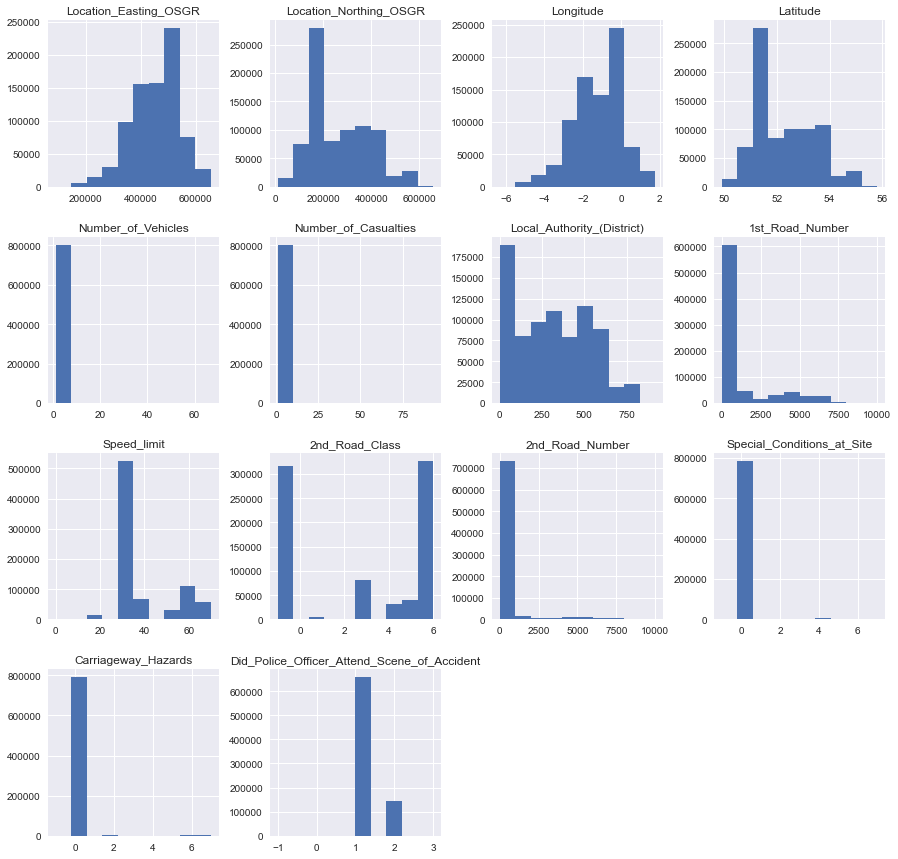

In [27]:
#Histograms
plt.figure()
accidents.hist(figsize=(15,15));

**Quick look at correlation between the variables**

<AxesSubplot:>

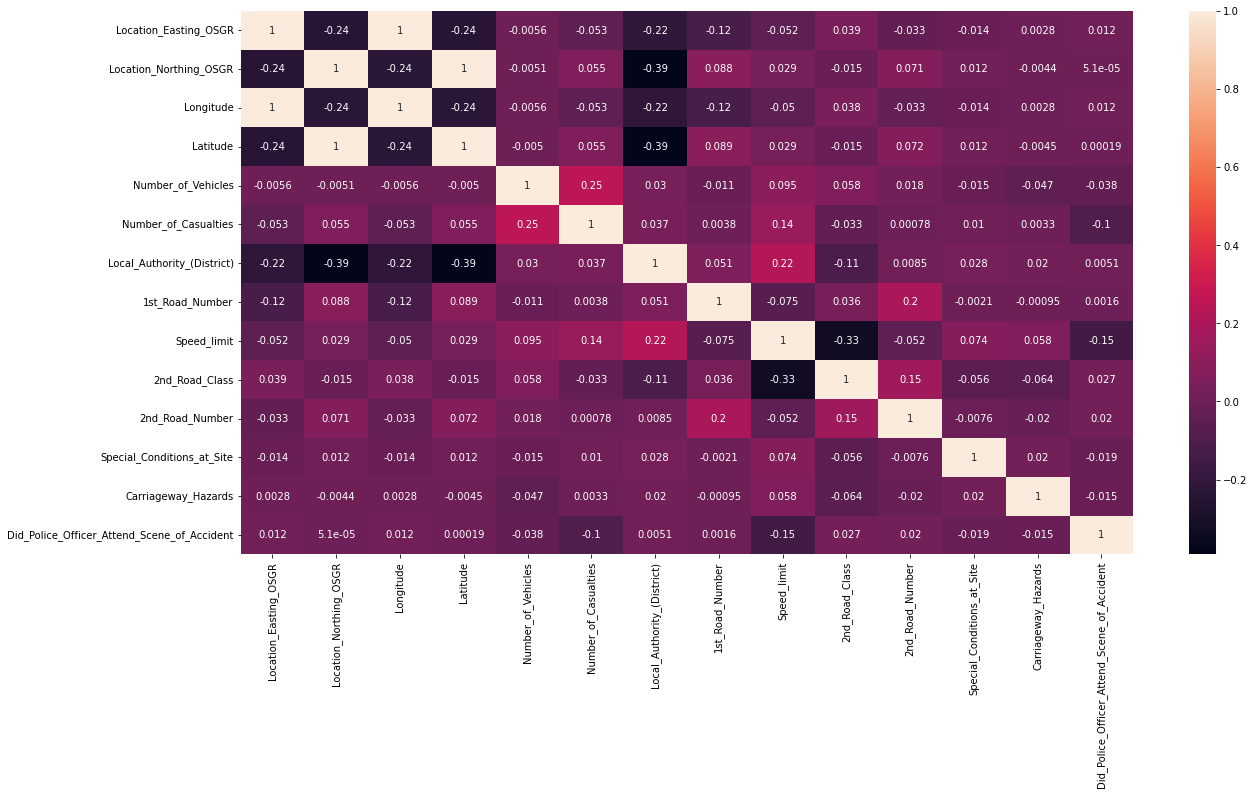

In [14]:
#correlation 
accidents_corr = accidents.corr()
plt.figure(figsize=(20,10))
sns.heatmap(accidents_corr, annot=True)

According to the correlation matrix no strong correlation between variables was identified.

**What is the total number of accidents for each day?**

In [13]:
#accidents = accidents.reset_index()
accidents.groupby('Date')['Accident_Index'].count()

Date
2010-01-01    267
2010-01-02    260
2010-01-03    244
2010-01-04    365
2010-01-05    350
             ... 
2015-12-27    236
2015-12-28    186
2015-12-29    276
2015-12-30    237
2015-12-31    294
Name: Accident_Index, Length: 2191, dtype: int64

**What is the number of accidents per day of the week?**

/Users/sabina/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


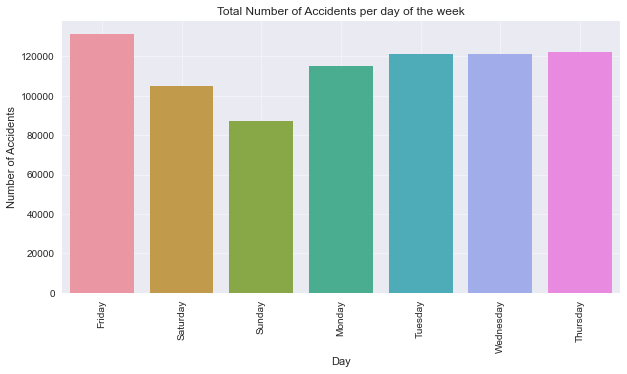

In [16]:
plt.figure(figsize=(10,5))
ax=sns.countplot('Day_of_Week',data=accidents)
plt.xticks(rotation=90)
plt.grid(alpha=0.4)
plt.title('Total Number of Accidents per day of the week')
plt.xlabel('Day')
plt.ylabel('Number of Accidents')
plt.style.use('seaborn')

According to the plot above it can be noticed that less accidents were during weekends which can be explained by the fact that there are less cars riding on the weekends.

**Map of severity of the accidents**

 Using longitude and latitude information, we can see what area has the most accidents based on accident severity(slight-serious-fatal). However, it actually depends on how much traffic the area has. The accident plots can give us really good idea about traffic in any area of the UK.

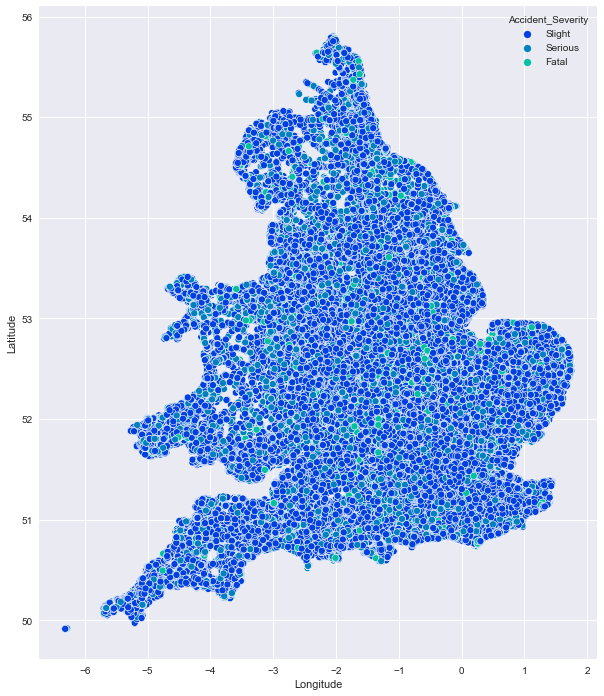

In [133]:
#quantity and severity of the accidents
plt.figure(figsize = (10,12))
sns.scatterplot(data=accidents, x = "Longitude", y = "Latitude", hue = "Accident_Severity", palette = "winter")
plt.show()

## Casualties dataset

**Summary Stats of Casualties variables**

In [26]:
#summary stats
casualties.describe()

,Vehicle_Reference,Casualty_Reference,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type
count,2.216720e+06,2.216720e+06,2.216720e+06,2.216720e+06,2.216720e+06,2.216720e+06,2.216720e+06,2.216720e+06,2.216720e+06,2.216720e+06,2.216720e+06,2.216720e+06
mean,1.485031e+00,1.433611e+00,3.435309e+01,6.020044e+00,2.866671e+00,6.663922e-01,4.740599e-01,2.828526e-01,9.074669e-02,-6.254159e-01,7.510757e+00,9.904936e-01
std,6.671878e-01,1.404250e+00,1.885804e+01,2.406346e+00,3.692819e-01,1.959742e+00,1.660281e+00,5.933772e-01,5.674798e-01,5.526900e-01,7.170375e+00,1.031795e+00
min,1.000000e+00,1.000000e+00,-1.000000e+00,-1.000000e+00,1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00
25%,1.000000e+00,1.000000e+00,2.000000e+01,4.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,3.000000e+00,1.000000e+00
50%,1.000000e+00,1.000000e+00,3.100000e+01,6.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,9.000000e+00,1.000000e+00
75%,2.000000e+00,2.000000e+00,4.600000e+01,8.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e+00,1.000000e+00
max,9.100000e+01,8.520000e+02,1.030000e+02,1.100000e+01,3.000000e+00,1.000000e+01,9.000000e+00,2.000000e+00,4.000000e+00,2.000000e+00,9.800000e+01,3.000000e+00


**Check the correlation between the Casualties variables.**

<AxesSubplot:>

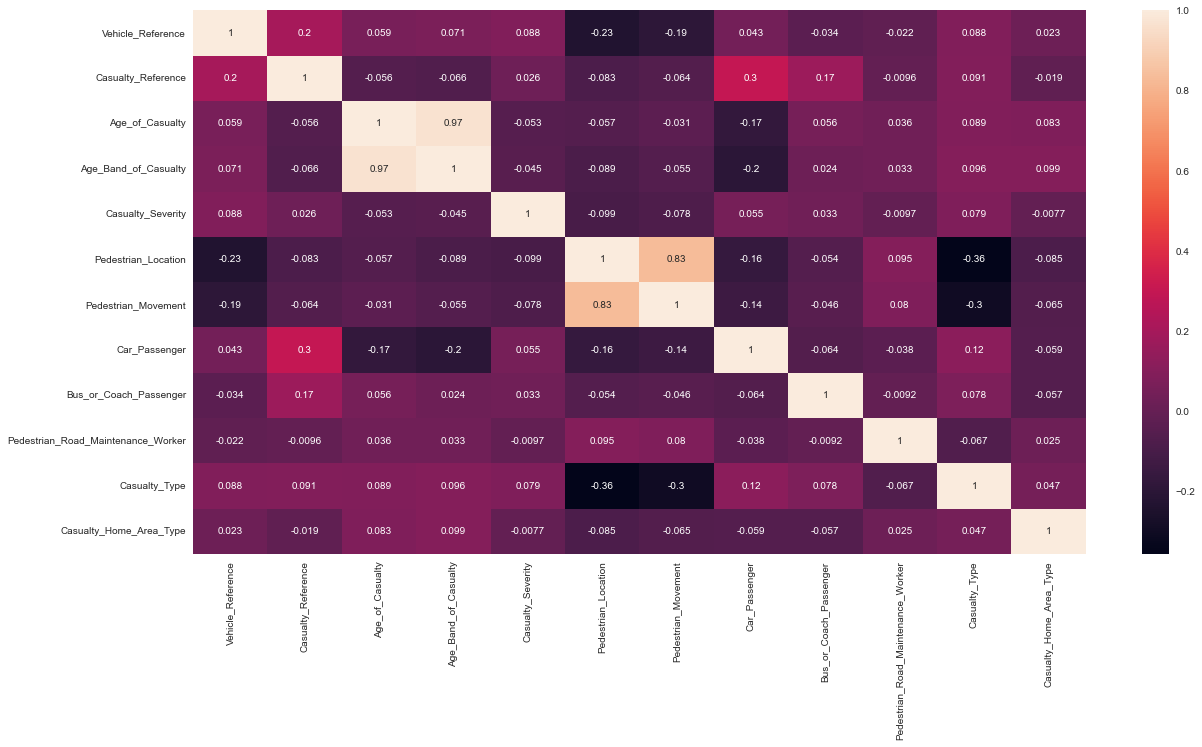

In [152]:
#correlation
casualties_corr = casualties.corr()
plt.figure(figsize=(20,10))
sns.heatmap(casualties_corr, annot=True)

**Look at the distribution of the casualties variables.**

<Figure size 576x396 with 0 Axes>

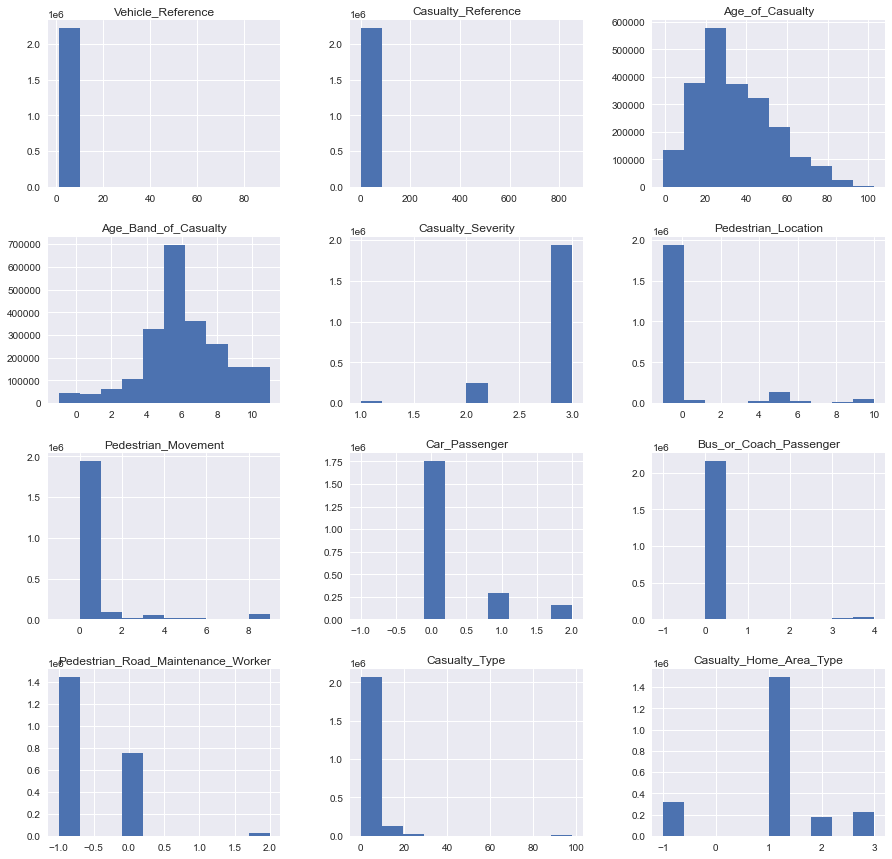

In [22]:
#Histograms
plt.figure()
casualties.hist(figsize=(15,15));

**Distribution of casualty class**

/Users/sabina/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


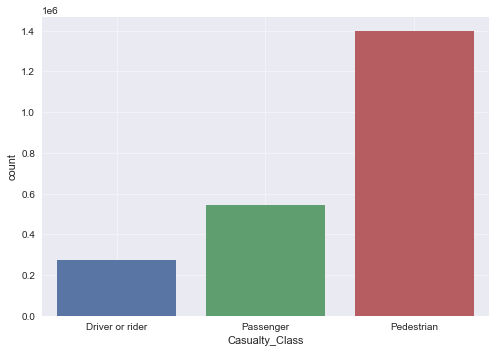

In [24]:
plt.figure()
ax=sns.countplot('Casualty_Class', data=casualties)
ax.set_xticklabels(['Driver or rider','Passenger','Pedestrian'])
plt.grid(alpha=0.4)
plt.show()

According to the barplot above more casualties happened with pedestrians comparing to drivers and passengers.

## Accidents-Casualties merged dataset

**Merge the Accidents and Casualties datasets**

In [29]:
#merge datasets
df = accidents.reset_index().merge(casualties, right_index=True, left_index=True)
df.head(10)

,Date,Accident_Index_x,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type
0,2010-01-01,201042I000801,616890.0,218160.0,1.145647,51.819901,Essex,Slight,2,1,...,37,7,2,1,1,0,0,-1,0,1
1,2010-01-01,2010160D00251,507250.0,427600.0,-0.375621,53.733764,Humberside,Slight,4,2,...,37,7,3,0,0,0,4,-1,11,1
2,2010-01-01,201042I000601,600060.0,224770.0,0.905620,51.885531,Essex,Slight,1,1,...,62,9,3,0,0,0,0,-1,9,1
3,2010-01-01,201042I000701,616020.0,215510.0,1.131393,51.796447,Essex,Slight,1,1,...,30,6,3,5,2,0,0,-1,0,1
4,2010-01-01,201042I000301,604510.0,223730.0,0.969574,51.874579,Essex,Serious,2,1,...,49,8,3,0,0,0,0,-1,3,-1
5,2010-01-01,201004BC10003,333170.0,438470.0,-3.017092,53.838163,Lancashire,Slight,1,2,...,30,6,3,0,0,0,0,-1,3,1
6,2010-01-01,201020D045212,413560.0,295860.0,-1.801415,52.560380,West Midlands,Slight,1,1,...,31,6,3,0,0,0,0,-1,3,-1
7,2010-01-01,201042I000501,542320.0,207270.0,0.060130,51.746010,Essex,Slight,1,1,...,13,3,3,6,9,0,0,-1,0,1
8,2010-01-01,201060L000337,259240.0,371720.0,-4.109940,53.223813,North Wales,Slight,1,1,...,13,3,3,6,9,0,0,-1,0,1
9,2010-01-01,2010120000593,478670.0,466510.0,-0.798765,54.088499,North Yorkshire,Slight,2,4,...,35,6,3,0,0,0,0,-1,9,1


**Subset the data to answer analytical questions.**

In [30]:
df1 = df[['Date','Accident_Index_x', 'Accident_Severity','Number_of_Casualties' ,'Road_Type','Speed_limit','Junction_Detail', 
          'Light_Conditions', 'Weather_Conditions', 'Road_Surface_Conditions', 'Urban_or_Rural_Area',
          'Age_of_Casualty','Sex_of_Casualty', 'Casualty_Class', 'Casualty_Type', 'Special_Conditions_at_Site']]

**Look at the very first observations of df1.**

In [163]:
df1.head()

,Date,Accident_Index_x,Accident_Severity,Number_of_Casualties,Road_Type,Speed_limit,Junction_Detail,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Age_of_Casualty,Sex_of_Casualty,Casualty_Class,Casualty_Type,Special_Conditions_at_Site
0,2010-01-01,201042I000801,Slight,1,Single carriageway,60,Not at junction or within 20 metres,Daylight,Fine no high winds,Frost or ice,Rural,37,Male,Pedestrian,0,0
1,2010-01-01,2010160D00251,Slight,2,Single carriageway,30,Not at junction or within 20 metres,Darkness - lights lit,Fine no high winds,Frost or ice,Urban,37,Male,Passenger,11,0
2,2010-01-01,201042I000601,Slight,1,Dual carriageway,30,T or staggered junction,Daylight,Fine no high winds,Frost or ice,Urban,62,Male,Driver or rider,9,0
3,2010-01-01,201042I000701,Slight,1,One way street,30,Not at junction or within 20 metres,Daylight,Other,Frost or ice,Urban,30,Male,Pedestrian,0,0
4,2010-01-01,201042I000301,Serious,1,Single carriageway,60,T or staggered junction,Darkness - no lighting,Snowing no high winds,Wet or damp,Rural,49,Male,Driver or rider,3,0


## Number of accidents vs Environmental conditions

### Question 1a: How number of accidents differs for various environmental conditions (road type, light conditions and weather conditions) ?

**Number of accidents based on road type:**

/Users/sabina/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


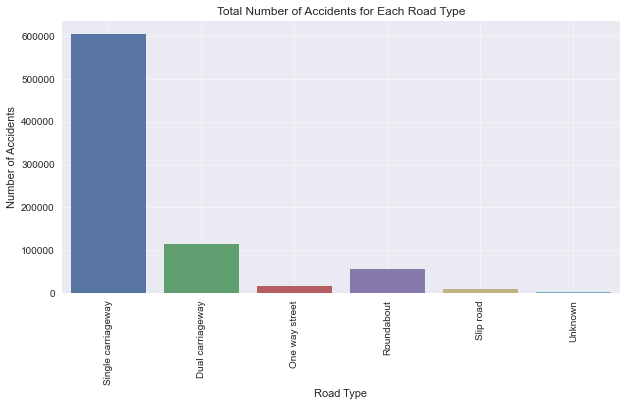

In [42]:
plt.figure(figsize=(10,5))
ax=sns.countplot('Road_Type',data=accidents)
plt.xticks(rotation=90)
plt.grid(alpha=0.4)
plt.title('Total Number of Accidents for Each Road Type')
plt.xlabel('Road Type')
plt.ylabel('Number of Accidents')
plt.style.use('seaborn')

According to the plot above most of the accidents happened on the single carriageway road type.

**Number of accidents based on light conditions**

/Users/sabina/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/var/folders/lc/3yknv_8x5832sztwzg33_tcw0000gn/T/ipykernel_19037/4247416742.py:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.xticks(Rotation=90)


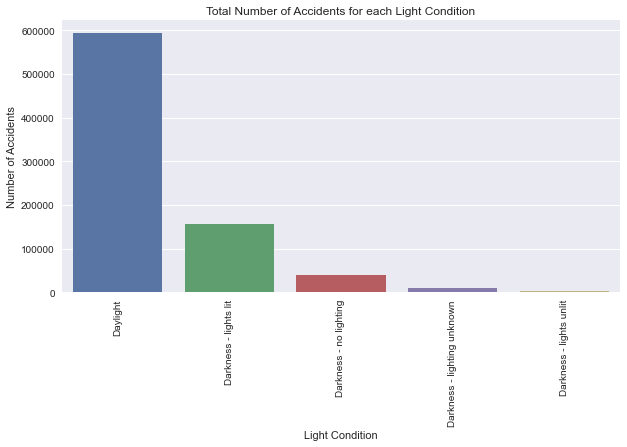

In [41]:
plt.figure(figsize=(10,5))
ax=sns.countplot('Light_Conditions',data=accidents) 
plt.xticks(Rotation=90)
plt.title('Total Number of Accidents for each Light Condition')
plt.xlabel('Light Condition')
plt.ylabel('Number of Accidents')
plt.style.use('seaborn')

Most of the accidents happened during the daylight.

**Number of accidents based on weather condition:**

/Users/sabina/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


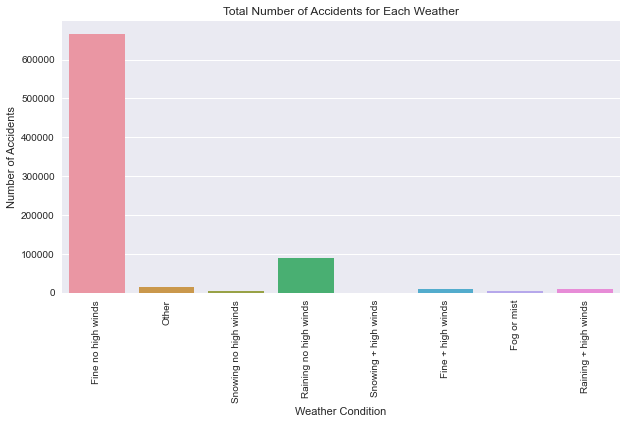

In [43]:
plt.figure(figsize=(10,5))
ax=sns.countplot('Weather_Conditions',data=accidents)
plt.xticks(rotation=90)
plt.title('Total Number of Accidents for Each Weather')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.style.use('seaborn')

Most of the accidents happened during the fine weather with no high winds. We were expecting more accidents happening during the bad weather conditions including rain, snow. Below we will check weather accidents relationship in more details.

**Summary of the distribution of the accidents based on the environmental condition such as Light condition, Weather Conditions, and Road Surface Conditions**

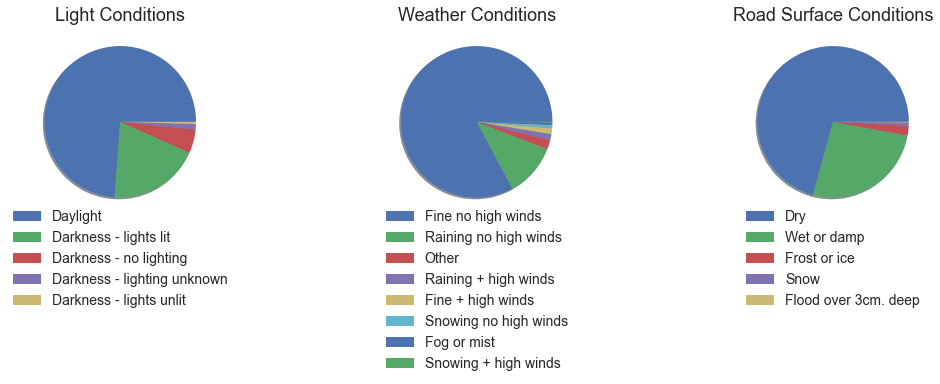

In [17]:
#Plot summary of accident counts for each value of each environmental condition
fig4,ax4 = plt.subplots(1,3,figsize=(15,5))
ax4[0].pie(accidents['Light_Conditions'].value_counts(), shadow=True)
ax4[0].set_title('Light Conditions',fontsize=18)
pieleg0 = ax4[0].legend(labels=accidents['Light_Conditions'].value_counts().index,bbox_to_anchor=(0.5,0.1), fontsize=14,loc="upper center")
ax4[1].pie(accidents['Weather_Conditions'].value_counts(), shadow=True)
ax4[1].set_title('Weather Conditions',fontsize=18)
pieleg1 = ax4[1].legend(labels=accidents['Weather_Conditions'].value_counts().index,bbox_to_anchor=(0.5,0.1), fontsize=14,loc="upper center")
ax4[2].pie(accidents['Road_Surface_Conditions'].value_counts(), shadow=True)
ax4[2].set_title('Road Surface Conditions',fontsize=18)
pieleg2 = ax4[2].legend(labels=accidents['Road_Surface_Conditions'].value_counts().index,bbox_to_anchor=(0.5,0.1), fontsize=14,loc="upper center")
plt.savefig('Condition Pies.jpg', bbox_extra_artists=(pieleg0,pieleg1,pieleg2), bbox_inches='tight')
plt.tight_layout()


According to the pie charts above it can be concluded that most accidents occured according to the light conditions during the daylight, according to the weather conditions when there weather was fine with no high winds and according to the road surface conditions when it was dry. 

### Question 1b: How number of accidents differs for various environmental conditions (road type, light conditions and weather conditions) by accident severity level?

**Look at the Accident Severity by casualty class, light conditions, and road type**

/Users/sabina/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


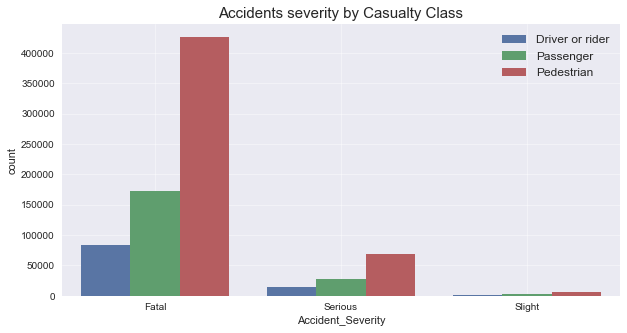

In [32]:
#Accidents severity by casualty class

plt.figure(figsize=(10,5))
ax=sns.countplot('Accident_Severity',hue='Casualty_Class',data=df1)
plt.legend(['Driver or rider','Passenger','Pedestrian'],fontsize=12)
ax.set_xticklabels(['Fatal','Serious','Slight'])
plt.title('Accidents severity by Casualty Class', fontsize=15)
plt.grid(alpha=0.4)

According to the barplot above for all levels of severities of accidents most of the casualties happened with pedestrians and less with drivers.

/Users/sabina/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


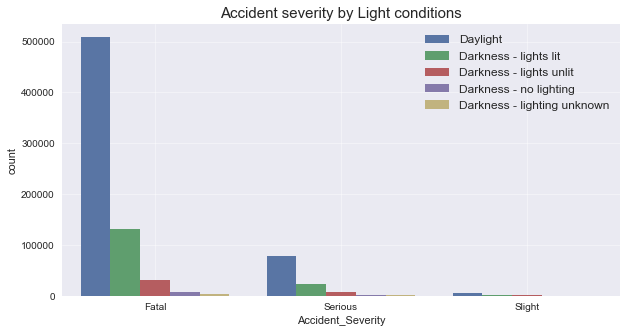

In [34]:
#Accidents severity by light conditions

plt.figure(figsize=(10,5))
ax=sns.countplot('Accident_Severity', hue='Light_Conditions', data=df1)
plt.legend(['Daylight','Darkness - lights lit','Darkness - lights unlit','Darkness - no lighting','Darkness - lighting unknown'],fontsize=12)
ax.set_xticklabels(['Fatal','Serious','Slight'])
plt.title('Accident severity by Light conditions', fontsize=15)
plt.grid(alpha=0.4)

According to the barplot above it can be concluded that for all types of accident severity most of the accidents happened mainly during the dayight.

/Users/sabina/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


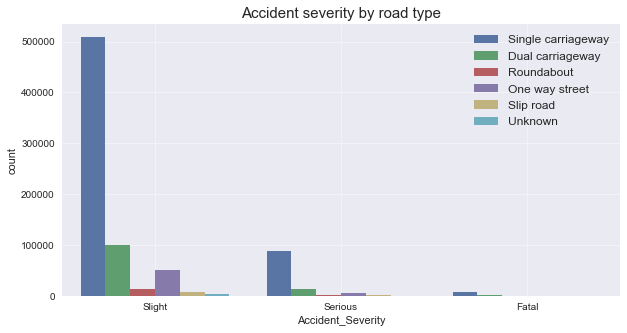

In [39]:
#Accidents severity by road type

plt.figure(figsize=(10,5))
sns.countplot('Accident_Severity', hue='Road_Type', data=df1)
ax.set_xticklabels(['Fatal','Serious','Slight'])
plt.legend(['Single carriageway','Dual carriageway','Roundabout','One way street','Slip road','Unknown'], fontsize=12)
plt.title('Accident severity by road type', fontsize=15)
plt.grid(alpha=0.4)

According to the barplot above for all types of accident severity most of the accidents happened on the single carriageway road type.

In [45]:
#nbmerge accidents_analysis_1.ipynb data_manipulation.ipynb > UK.ipynb

## Casualties vs Age

### Q2: Do people become more careful on the roads with age?

**Distrubution of casualties by age:**

/Users/sabina/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


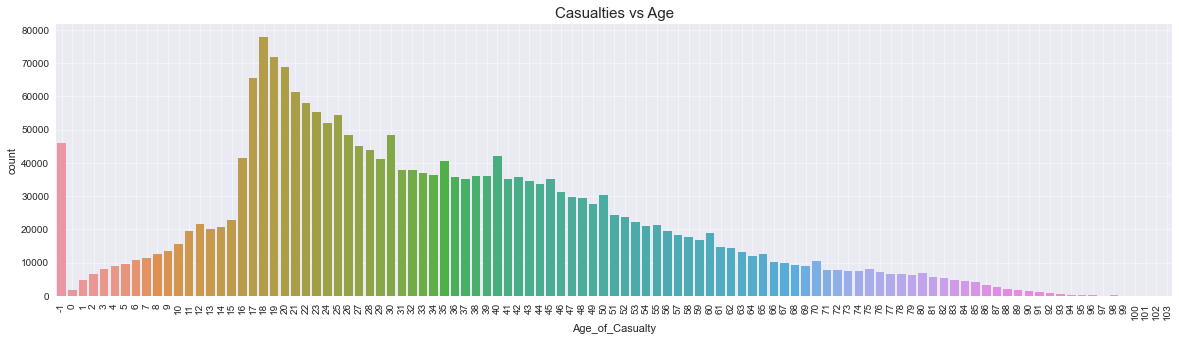

In [67]:
plt.figure(figsize=(20,5))
sns.countplot('Age_of_Casualty',data=casualties)
plt.title('Casualties vs Age', fontsize=15)
plt.xticks(rotation=90)
plt.grid(alpha=0.4)
plt.show()

According to the distribution above more casualties happened with those aged between 17 to 30 years.

**Distrubution of casualties by age and gender:**

/Users/sabina/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


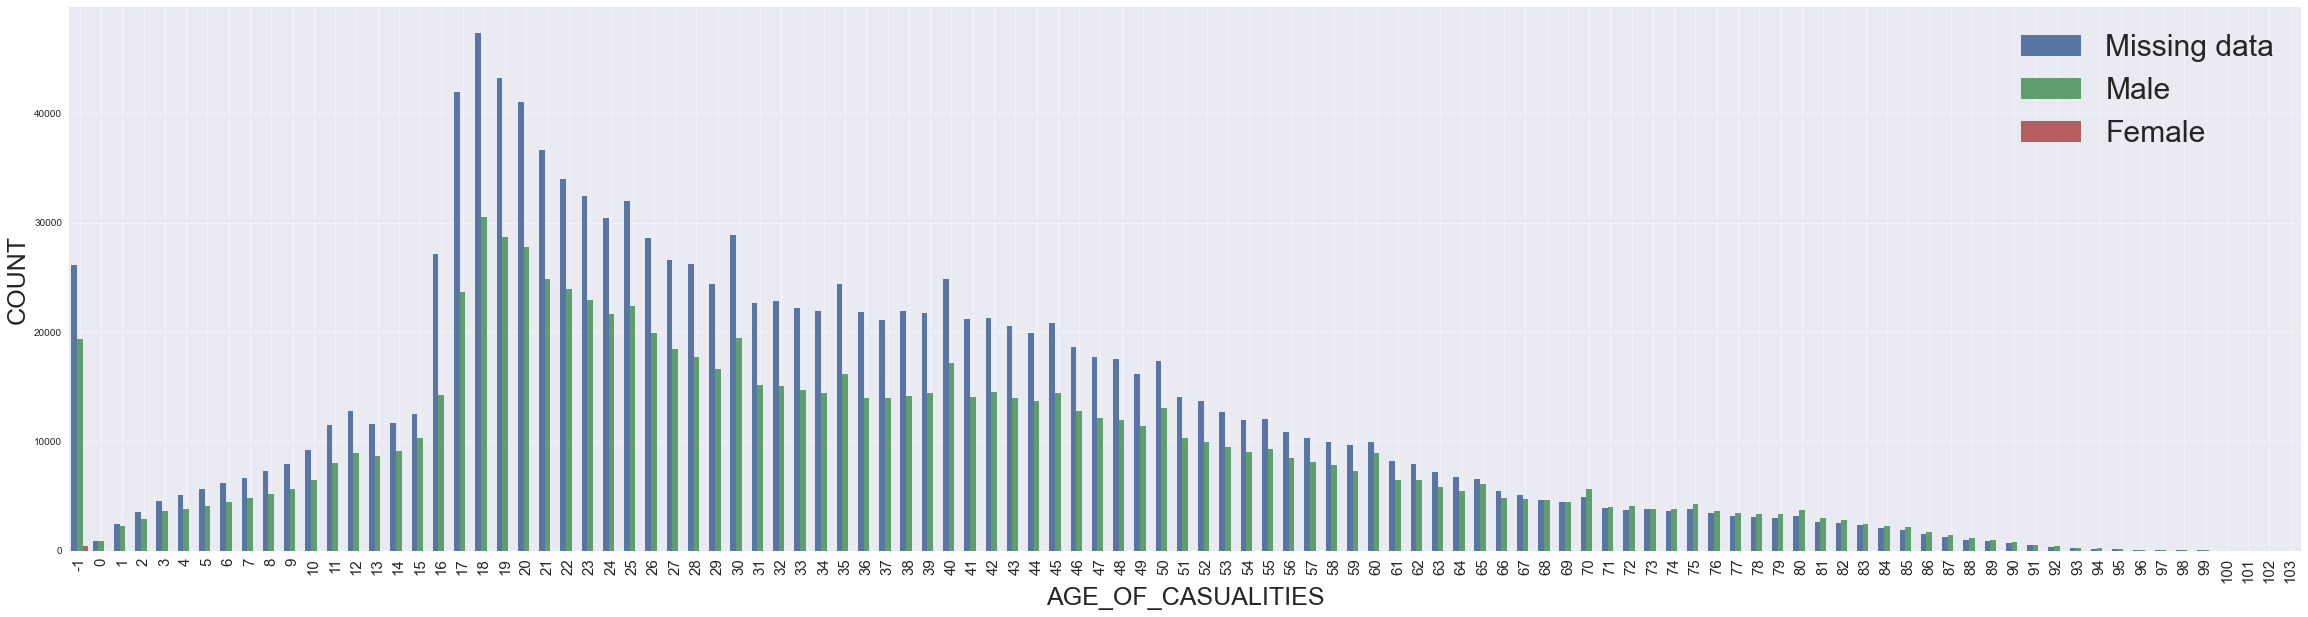

In [23]:
plt.figure(figsize=(40,10))
sns.countplot('Age_of_Casualty',hue='Sex_of_Casualty',data=casualties)
plt.xticks(fontsize=15,rotation=90)
plt.legend(['Missing data','Male','Female'],prop={'size': 30}, loc=1)
plt.grid(alpha=0.4)
plt.xlabel('AGE_OF_CASUALITIES', fontsize=25)
plt.ylabel('COUNT', fontsize=25)
plt.show()

According to the distribution above more casualties happened with males than females for most of the ages.

**So lets check whether people become more careful with age, reviewing number of fatal accidents on wet roads by driver's age.**

In [90]:
#Join the accidents and vehicles dataframes
wet_roads = accidents.reset_index().merge(vehicles, right_index=True, left_index=True)
df.head(10)

,Date,Accident_Index_x,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Accident_Index_y,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type
0,2010-01-01,201042I000801,616890.0,218160.0,1.145647,51.819901,Essex,Slight,2,1,Friday,14:20,461,E10000012,B,1442,Single carriageway,60,Not at junction or within 20 metres,Not at junction or within 20 metres,-1,0,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Frost or ice,0,0,Rural,1,E01022016,200501BS00001,1,1,Pedestrian,Male,37,7,2,1,1,0,0,-1,0,1
1,2010-01-01,2010160D00251,507250.0,427600.0,-0.375621,53.733764,Humberside,Slight,4,2,Friday,21:25,228,E06000010,Unclassified,0,Single carriageway,30,Not at junction or within 20 metres,Data missing or out of range,-1,0,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Frost or ice,0,0,Urban,1,E01012889,200501BS00002,1,1,Passenger,Male,37,7,3,0,0,0,4,-1,11,1
2,2010-01-01,201042I000601,600060.0,224770.0,0.905620,51.885531,Essex,Slight,1,1,Friday,11:10,455,E10000012,A,134,Dual carriageway,30,T or staggered junction,Give way or uncontrolled,6,0,None within 50 metres,"Pelican, puffin, toucan or similar non-junctio...",Daylight,Fine no high winds,Frost or ice,0,0,Urban,1,E01021686,200501BS00003,2,1,Driver or rider,Male,62,9,3,0,0,0,0,-1,9,1
3,2010-01-01,201042I000701,616020.0,215510.0,1.131393,51.796447,Essex,Slight,1,1,Friday,11:08,461,E10000012,Unclassified,0,One way street,30,Not at junction or within 20 metres,Not at junction or within 20 metres,-1,0,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Other,Frost or ice,0,0,Urban,1,E01022032,200501BS00004,1,1,Pedestrian,Male,30,6,3,5,2,0,0,-1,0,1
4,2010-01-01,201042I000301,604510.0,223730.0,0.969574,51.874579,Essex,Serious,2,1,Friday,02:05,455,E10000012,B,1027,Single carriageway,60,T or staggered junction,Give way or uncontrolled,6,0,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - no lighting,Snowing no high winds,Wet or damp,0,0,Rural,1,E01021736,200501BS00005,1,1,Driver or rider,Male,49,8,3,0,0,0,0,-1,3,-1
5,2010-01-01,201004BC10003,333170.0,438470.0,-3.017092,53.838163,Lancashire,Slight,1,2,Friday,08:35,85,E10000017,B,5268,Single carriageway,30,T or staggered junction,Give way or uncontrolled,6,0,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,0,0,Urban,1,E01025599,200501BS00006,2,1,Driver or rider,Female,30,6,3,0,0,0,0,-1,3,1
6,2010-01-01,201020D045212,413560.0,295860.0,-1.801415,52.560380,West Midlands,Slight,1,1,Friday,18:40,300,E08000025,Unclassified,0,Single carriageway,30,Not at junction or within 20 metres,Data missing or out of range,-1,0,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,0,0,Urban,1,E01009452,200501BS00007,1,1,Driver or rider,Male,31,6,3,0,0,0,0,-1,3,-1
7,2010-01-01,201042I000501,542320.0,207270.0,0.060130,51.746010,Essex,Slight,1,1,Friday,02:10,456,E10000012,B,181,Single carriageway,40,T or staggered junction,Give way or uncontrolled,4,181,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lig

In [91]:
#filter for wet roads
wet_roads = wet_roads[wet_roads['Road_Surface_Conditions'] == "Wet or damp"]
wet_roads = wet_roads[wet_roads['Accident_Severity'] == "Fatal"]
wet_roads = wet_roads[wet_roads['Age_of_Driver'] != -1]
wet_roads.head(10)

,Date,Accident_Index_x,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Accident_Index_y,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,Hit_Object_off_Carriageway,1st_Point_of_Impact,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type
4,2010-01-01,201042I000301,604510.0,223730.0,0.969574,51.874579,Essex,Serious,2,1,Friday,02:05,455,E10000012,B,1027,Single carriageway,60,T or staggered junction,Give way or uncontrolled,6,0,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - no lighting,Snowing no high winds,Wet or damp,0,0,Rural,1,E01021736,200501BS00004,1,9,0,18,0,0,0,0,0,0,1,1,15,2,49,8,1769,1,4,2,1
8,2010-01-01,201060L000337,259240.0,371720.0,-4.109940,53.223813,North Wales,Slight,1,1,Friday,04:06,722,W06000002,A,5,Single carriageway,40,Not at junction or within 20 metres,Data missing or out of range,-1,0,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - no lighting,Fine no high winds,Wet or damp,0,0,Rural,1,W01000091,200501BS00007,1,3,0,18,0,1,0,4,0,0,1,1,15,1,31,6,-1,-1,-1,-1,-1
10,2010-01-01,201060L000698,281890.0,316370.0,-3.750630,52.732008,North Wales,Slight,1,1,Friday,17:37,722,W06000002,A,470,Single carriageway,60,Not at junction or within 20 metres,Data missing or out of range,-1,0,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - no lighting,Snowing no high winds,Wet or damp,0,7,Rural,1,W01000060,200501BS00009,1,9,0,18,0,0,0,0,1,0,1,1,15,1,68,10,5343,1,16,6,1
12,2010-01-01,2010120000514,456890.0,424160.0,-1.139550,53.710764,North Yorkshire,Slight,2,1,Friday,12:30,187,E10000023,A,19,Single carriageway,60,T or staggered junction,Give way or uncontrolled,5,410,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Wet or damp,0,0,Rural,1,E01027890,200501BS00010,2,9,0,9,0,8,0,0,0,0,1,1,15,2,48,8,-1,-1,-1,5,1
19,2010-01-01,2010120000169,461320.0,452500.0,-1.066795,53.964952,North Yorkshire,Slight,4,1,Friday,02:19,189,E06000014,Unclassified,0,Single carriageway,30,Not at junction or within 20 metres,Data missing or out of range,-1,0,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Wet or damp,0,0,Urban,1,E01013380,200501BS00016,1,9,0,18,0,8,0,7,7,1,1,1,15,1,34,6,698,1,2,7,1
20,2010-01-01,2010120000625,438060.0,473500.0,-1.418690,54.155915,North Yorkshire,Slight,1,1,Friday,17:55,182,E10000023,A,168,Dual carriageway,70,Not at junction or within 20 metres,Data missing or out of range,-1,0,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - no lighting,Fine no high winds,Wet or damp,0,0,Rural,1,E01027737,200501BS00016,2,9,0,7,0,8,0,0,0,0,0,1,15,1,33,6,2148,2,4,4,1
25,2010-01-01,2010440001620,438710.0,109570.0,-1.451097,50.884265,Hampshire,Slight,1,1,Friday,14:31,496,E10000014,A,326,Single carriageway,40,Not at junction or within 20 metres,Data missing or out of range,-1,0,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Wet or damp,0,0,Rural,1,E01023050,200501BS00020,1,9,0,9,0,8,0,0,0,0,3,1,15,1,27,6,1998,1,7,6,1
31,2010-01

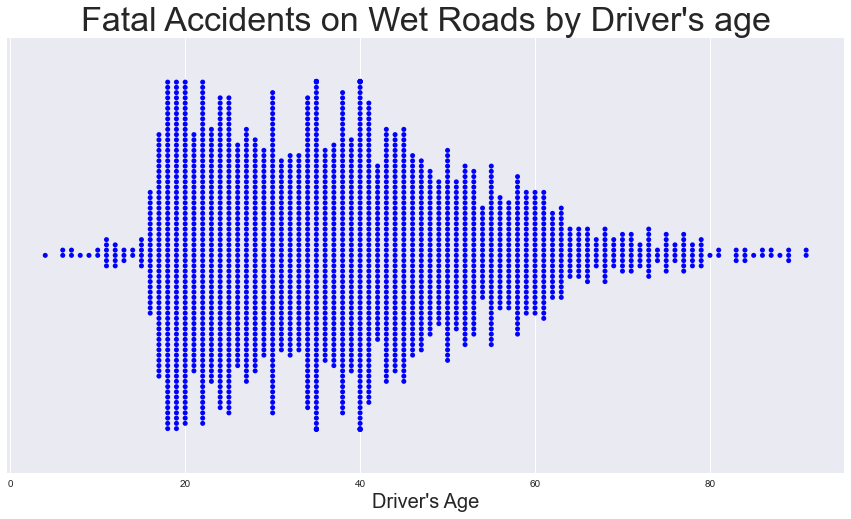

In [104]:
plt.rcParams['figure.figsize'] = [15, 8]

#create swarmplot
sns.swarmplot(x=wet_roads["Age_of_Driver"], color='blue')
plt.xlabel("Driver's Age", fontdict = {'fontsize' : 20})
plt.title("Fatal Accidents on Wet Roads by Driver's age", fontdict = {'fontsize' : 34})
plt.show()

From the plot above it can be noticed that number of fatal accidents is becoming less with age. So people become more careful on wet roads after almost 40 years old.

# Number of accidents vs Weather conditions

## Accidents data preparation for Weather API

#### Expanding the number of columns of dataframe

In [46]:
pd.set_option('display.max_columns', None)

### Loading data

**Drop rows with missing values**

In [48]:
accidents_api = accidents_raw.dropna()

**Format date**

In [49]:
accidents_api['Date'] = pd.to_datetime(accidents_api['Date'], format='%d/%m/%Y')

/var/folders/lc/3yknv_8x5832sztwzg33_tcw0000gn/T/ipykernel_19037/1214226089.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accidents_api['Date'] = pd.to_datetime(accidents_api['Date'], format='%d/%m/%Y')


In [50]:
accidents_api = accidents_api.set_index('Date').sort_index()

### To answer second analytical question on relationship between number of accidents and weather conditions we are using *Visualcrossing* Weather API. In order to use Weather API, we are adding city column using geocoder package. It takes hours to load cities, that is why we did it partly, that is by months or weeks). Since we have a limited access to Weather API with our subscription, we decided to filter data for accidents occured during 2015 year

In [9]:
accidents_dec1 = accidents_api.loc['2015-12-01':'2015-12-07']

In [10]:
accidents_dec1.shape

(2700, 31)

**Write a function with geocoder pachage to find city for each accident using latitude and longitude variables.**

In [11]:
def city_name(x):
    g = geocoder.osm([x.Latitude, x.Longitude], method='reverse').json
    if g:
        return g.get('city')
    else:
        return 'no city'

**Apply function**

In [16]:
accidents_dec1['city'] = accidents_dec1[['Latitude', 'Longitude']].apply(city_name, axis=1)

/var/folders/lc/3yknv_8x5832sztwzg33_tcw0000gn/T/ipykernel_38605/2244529344.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accidents_dec1['city'] = accidents_dec1[['Latitude', 'Longitude']].apply(city_name, axis=1)


**Save new dataframe with city column to csv file**

In [17]:
accidents_dec1.to_csv('01122015-07122015.csv')

**We repeated 5 previous steps for all selected date ranges to get data of 2015 year. Then loaded all data and consolidated them in *accidents_withcities* dataframe.**

In [12]:
september = pd.read_csv('/Users/sabina/Documents/2022/project/data/cities/01092015-30092015.csv',on_bad_lines='skip')
october = pd.read_csv('/Users/sabina/Documents/2022/project/data/cities/01102015-31102015.csv',on_bad_lines='skip')
november = pd.read_csv('/Users/sabina/Documents/2022/project/data/cities/01112015-30112015.csv',on_bad_lines='skip')

In [13]:
december = pd.read_csv('/Users/sabina/Documents/2022/project/data/cities/01122015-31122015.csv',on_bad_lines='skip')
january = pd.read_csv('/Users/sabina/Documents/2022/project/data/cities/01012015-31012015.csv',on_bad_lines='skip')
february = pd.read_csv('/Users/sabina/Documents/2022/project/data/cities/01022015-28022015.csv',on_bad_lines='skip')

In [14]:
march = pd.read_csv('/Users/sabina/Documents/2022/project/data/cities/01032015-31032015.csv',on_bad_lines='skip')
april = pd.read_csv('/Users/sabina/Documents/2022/project/data/cities/01042015-30042015.csv',on_bad_lines='skip')
may = pd.read_csv('/Users/sabina/Documents/2022/project/data/cities/01052015-31052015.csv',on_bad_lines='skip')

In [15]:
june = pd.read_csv('/Users/sabina/Documents/2022/project/data/cities/01062015-30062015.csv',on_bad_lines='skip')
july = pd.read_csv('/Users/sabina/Documents/2022/project/data/cities/01072015-31072015.csv',on_bad_lines='skip')
august = pd.read_csv('/Users/sabina/Documents/2022/project/data/cities/01082015-31082015.csv',on_bad_lines='skip')

In [16]:
accidents_withcities=pd.concat([january,february,march,april,may,june,july,august,september,october,november,december])

In [17]:
accidents_withcities.head(10)

,Date,Accident_Index_x,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,city,Accident_Index
0,2015-01-01,2015450021404,520918.0,165420.0,-0.264115,51.374969,45,3,1,1,5,17:29,38,E10000030,6,2099,6,30,0,-1,-1,0,0,0,7,1,2,0,0,1,1,E01030388,Epsom and Ewell,NaN
1,2015-01-01,2015450021402,521727.0,153984.0,-0.256400,51.272014,45,3,1,1,5,12:18,513,E10000030,1,25,3,70,0,-1,-1,0,0,0,1,2,2,0,0,2,1,E01030639,Reigate and Banstead,NaN
2,2015-01-01,2015460251429,558490.0,173060.0,0.278702,51.434375,46,3,1,1,5,22:00,532,E10000016,4,255,1,40,1,4,6,0,0,0,4,8,2,0,0,2,1,E01024141,Dartford,NaN
3,2015-01-01,2015460251435,612500.0,156530.0,1.044814,51.268290,46,3,4,5,5,03:00,531,E10000016,3,28,6,30,0,-1,-1,0,0,0,4,1,2,0,0,1,1,E01024127,Canterbury,NaN
4,2015-01-01,2015460251450,635800.0,166190.0,1.384607,51.345845,46,2,2,1,5,14:28,541,E10000016,3,256,6,30,3,4,6,0,0,0,1,1,1,0,0,1,1,E01024682,Thanet,NaN
5,2015-01-01,2015100003115,420292.0,565382.0,-1.684459,54.982629,10,3,2,1,5,13:00,147,E08000021,3,191,1,30,1,4,3,186,0,0,1,1,1,0,0,1,1,E01008344,Newcastle upon Tyne,NaN
6,2015-01-01,2015460251483,637240.0,170020.0,1.407799,51.379623,46,3,2,4,5,00:40,541,E10000016,4,2052,6,30,0,-1,-1,0,0,1,4,1,2,0,0,1,1,E01024666,Thanet,NaN
7,2015-01-01,2015450020982,499202.0,149790.0,-0.580344,51.238676,45,3,2,1,5,21:50,511,E10000030,6,4003,6,30,0,-1,-1,0,0,0,4,5,2,0,0,1,1,E01030452,NaN,NaN
8,2015-01-01,2015100000615,424679.0,566841.0,-1.615787,54.995543,10,3,2,1,5,17:00,147,E08000021,3,189,6,30,1,4,4,1318,0,0,4,4,2,0,0,1,1,E01008369,Newcastle upon Tyne,NaN
9,2015-01-01,2015100000115,429961.0,581447.0,-1.531700,55.126501,10,3,1,1,5,17:15,139,E06000048,6,9704,6,30,0,-1,-1,0,0,0,4,2,2,0,0,1,1,E01027392,NaN,NaN


**Check the number of rows and columns**

In [19]:
accidents_withcities.shape

(133154, 34)

**Since we are limited in usage of API with our subscription, we decided to filter data for the most frequent city.**

In [20]:
accidents_withcities['city'].mode()

0    London
dtype: object

**Filter dataframe for the most frequent city - London**

In [21]:
accidents_London_2015 = accidents_withcities[accidents_withcities['city']=="London"]

**Check the number of rows and columns**

In [22]:
accidents_London_2015.shape

(23651, 34)

In [23]:
accidents_London_2015.head(10)

,Date,Accident_Index_x,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,city,Accident_Index
17,2015-01-01,201501JC30088,538410.0,186780.0,-0.004597,51.562921,1,3,2,4,5,17:00,13,E09000031,4,161,6,30,3,4,6,0,0,0,4,1,1,0,0,1,1,E01004373,London,NaN
28,2015-01-01,201501GD10020,533950.0,183510.0,-0.070144,51.534611,1,3,2,1,5,04:00,4,E09000012,4,108,6,30,0,-1,-1,0,0,5,4,1,1,0,0,1,2,E01001774,London,NaN
35,2015-01-01,201501GD10022,532050.0,187470.0,-0.096036,51.570645,1,3,2,1,5,22:30,4,E09000012,3,503,6,30,6,2,3,105,0,5,4,2,2,0,0,1,1,E01001714,London,NaN
37,2015-01-01,201501ZD30148,534550.0,164390.0,-0.068762,51.362649,1,3,1,1,5,23:55,20,E09000008,3,212,6,30,3,4,5,0,0,0,4,2,2,0,0,1,1,E01001122,London,NaN
48,2015-01-01,201501MM70020,532510.0,176890.0,-0.093378,51.475460,1,3,1,1,5,19:41,8,E09000028,3,215,6,30,3,4,3,215,0,0,4,1,1,0,0,1,1,E01003921,London,NaN
49,2015-01-01,201501QK50060,518960.0,184060.0,-0.285969,51.542909,1,3,4,2,5,03:41,28,E09000005,6,0,6,30,9,4,6,0,0,0,4,1,1,0,0,1,1,E01000477,London,NaN
51,2015-01-01,201501HT20022,534580.0,181310.0,-0.061906,51.514692,1,3,2,1,5,04:25,5,E09000030,3,13,6,30,6,2,4,108,0,5,4,1,1,0,0,1,1,E01004319,London,NaN
54,2015-01-01,201501HT20025,534940.0,181990.0,-0.056461,51.520717,1,3,1,1,5,23:50,5,E09000030,3,107,6,30,0,-1,-1,0,0,0,4,1,2,0,0,1,1,E01004208,London,NaN
57,2015-01-01,201501HT20122,534810.0,181850.0,-0.058387,51.519490,1,3,1,1,5,00:05,5,E09000030,3,11,3,30,3,4,5,0,0,4,4,1,2,0,0,1,1,E01004208,London,NaN
66,2015-01-01,201501EK40147,530770.0,181590.0,-0.116677,51.518102,1,3,1,1,5,02:15,2,E09000007,5,0,6,30,3,4,3,40,0,4,4,1,1,0,0,1,2,E01000914,London,NaN


## Load weather data with *Visualcrossing* Weather API

**Get the weather data for London in 2015**

In [27]:
API_KEY="**PLEASE TYPE YOUR API" 
LOCATION="London,UK"
UNIT_GROUP="us"
start_date = '2015-01-01'
end_date = '2015-12-31'

def getWeatherForecast():
    requestUrl = "https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/" + urllib.parse.quote_plus(LOCATION)
    requestUrl = requestUrl+'/'+str(start_date)+'/'+str(end_date)+"?key="+API_KEY+"&unitGroup="+UNIT_GROUP+"&include=days";
    print('Weather requestUrl={requestUrl}'.format(requestUrl=requestUrl))
    

    try:
        req = urllib.request.urlopen(requestUrl)
    except:
                 print("Could not read from:"+requestUrl);
                 return []
                
    rawForecastData = req.read()
    req.close()
    return json.loads(rawForecastData)
    
    
weatherForecast = getWeatherForecast()

print('Weather forecast for {location}'.format(location=weatherForecast['resolvedAddress']))
days=weatherForecast['days'];

for day in days:
    print('{datetime} tempmax:{tempmax} tempmin:{tempmin} description:{description}'.format(datetime=day['datetime'], tempmax=day["tempmax"], tempmin=day["tempmin"], description=day["description"]))



Weather requestUrl=https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/London%2CUK/2015-01-01/2015-12-31?key=JHJKNRM6CC52KJTBZ66V29A86&unitGroup=us&include=days
Weather forecast for London, England, United Kingdom
2015-01-01 tempmax:53.3 tempmin:41.3 description:Clear conditions throughout the day with morning rain.
2015-01-02 tempmax:54.8 tempmin:41.1 description:Clear conditions throughout the day with early morning rain.
2015-01-03 tempmax:43.9 tempmin:36.6 description:Clear conditions throughout the day with rain in the morning and afternoon.
2015-01-04 tempmax:38.6 tempmin:32.3 description:Clear conditions throughout the day with afternoon rain.
2015-01-05 tempmax:49.7 tempmin:40.2 description:Clear conditions throughout the day.
2015-01-06 tempmax:51.0 tempmin:37.5 description:Clear conditions throughout the day with late afternoon rain.
2015-01-07 tempmax:50.3 tempmin:35.0 description:Clear conditions throughout the day with afternoon rain.
2015-0

In [28]:
london_weather = pd.DataFrame(days)

In [29]:
london_weather.head()

,datetime,datetimeEpoch,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,preciptype,snow,snowdepth,windgust,windspeed,winddir,pressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,sunrise,sunriseEpoch,sunset,sunsetEpoch,moonphase,conditions,description,icon,stations,source,tzoffset
0,2015-01-01,1420070400,53.3,41.3,47.7,53.3,41.3,47.7,43.5,85.34,0.01,None,4.17,None,None,NaN,37.2,0.1,209.3,1027.8,0.6,6.0,None,None,None,08:06:16,1420099576,16:01:49,1420128109,0.43,Rain,Clear conditions throughout the day with morni...,rain,"[03769099999, 03680099999, 03672099999, 037810...",obs,NaN
1,2015-01-02,1420156800,54.8,41.1,48.1,54.8,41.1,48.1,38.5,69.99,0.04,None,4.17,None,None,NaN,37.5,0.1,259.8,1028.9,0.3,17.4,None,None,None,08:06:09,1420185969,16:02:53,1420214573,0.46,Rain,Clear conditions throughout the day with early...,rain,"[03769099999, 03680099999, 03672099999, 037810...",obs,NaN
2,2015-01-03,1420243200,43.9,36.6,41.1,43.9,36.6,41.1,37.4,86.73,0.51,None,12.50,None,None,NaN,28.9,0.1,170.3,1024.0,0.6,7.7,None,None,None,08:05:59,1420272359,16:03:59,1420301039,0.49,Rain,Clear conditions throughout the day with rain ...,rain,"[03769099999, 03680099999, 03672099999, 037810...",obs,NaN
3,2015-01-04,1420329600,38.6,32.3,35.8,38.6,32.3,35.8,34.0,93.34,0.01,None,8.33,None,None,NaN,NaN,0.0,211.6,1035.3,0.4,1.7,None,None,None,08:05:46,1420358746,16:05:09,1420387509,0.50,Rain,Clear conditions throughout the day with after...,rain,"[03769099999, 03680099999, 03672099999, 037810...",obs,NaN
4,2015-01-05,1420416000,49.7,40.2,45.8,49.7,40.2,45.8,40.4,81.42,0.00,None,0.00,None,None,NaN,NaN,0.1,191.7,1029.2,0.6,9.4,None,None,None,08:05:29,1420445129,16:06:20,1420473980,0.50,Clear,Clear conditions throughout the day.,clear-day,"[03769099999, 03680099999, 03672099999, 037810...",obs,NaN


**Save London weather data to csv**

In [30]:
#london_weather.to_csv('/Users/ersankucukoglu/Desktop/Projects/accidents_python-project/data/clean/london_weather_data.csv')
london_weather.to_csv('/Users/sabina/Documents/2022/project/data/clean/london_weather.csv')

## Merge weather (london_weather_data) and accidents (accidents_London_2015) dataframes

**Review accidents and weather data before merging**

In [31]:
accidents_London_2015.head()

,Date,Accident_Index_x,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,city,Accident_Index
17,2015-01-01,201501JC30088,538410.0,186780.0,-0.004597,51.562921,1,3,2,4,5,17:00,13,E09000031,4,161,6,30,3,4,6,0,0,0,4,1,1,0,0,1,1,E01004373,London,NaN
28,2015-01-01,201501GD10020,533950.0,183510.0,-0.070144,51.534611,1,3,2,1,5,04:00,4,E09000012,4,108,6,30,0,-1,-1,0,0,5,4,1,1,0,0,1,2,E01001774,London,NaN
35,2015-01-01,201501GD10022,532050.0,187470.0,-0.096036,51.570645,1,3,2,1,5,22:30,4,E09000012,3,503,6,30,6,2,3,105,0,5,4,2,2,0,0,1,1,E01001714,London,NaN
37,2015-01-01,201501ZD30148,534550.0,164390.0,-0.068762,51.362649,1,3,1,1,5,23:55,20,E09000008,3,212,6,30,3,4,5,0,0,0,4,2,2,0,0,1,1,E01001122,London,NaN
48,2015-01-01,201501MM70020,532510.0,176890.0,-0.093378,51.475460,1,3,1,1,5,19:41,8,E09000028,3,215,6,30,3,4,3,215,0,0,4,1,1,0,0,1,1,E01003921,London,NaN


In [32]:
accidents_London_2015.rename(columns = {'Date':'date'}, inplace = True)

/Users/sabina/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [33]:
london_weather.head()

,datetime,datetimeEpoch,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,preciptype,snow,snowdepth,windgust,windspeed,winddir,pressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,sunrise,sunriseEpoch,sunset,sunsetEpoch,moonphase,conditions,description,icon,stations,source,tzoffset
0,2015-01-01,1420070400,53.3,41.3,47.7,53.3,41.3,47.7,43.5,85.34,0.01,None,4.17,None,None,NaN,37.2,0.1,209.3,1027.8,0.6,6.0,None,None,None,08:06:16,1420099576,16:01:49,1420128109,0.43,Rain,Clear conditions throughout the day with morni...,rain,"[03769099999, 03680099999, 03672099999, 037810...",obs,NaN
1,2015-01-02,1420156800,54.8,41.1,48.1,54.8,41.1,48.1,38.5,69.99,0.04,None,4.17,None,None,NaN,37.5,0.1,259.8,1028.9,0.3,17.4,None,None,None,08:06:09,1420185969,16:02:53,1420214573,0.46,Rain,Clear conditions throughout the day with early...,rain,"[03769099999, 03680099999, 03672099999, 037810...",obs,NaN
2,2015-01-03,1420243200,43.9,36.6,41.1,43.9,36.6,41.1,37.4,86.73,0.51,None,12.50,None,None,NaN,28.9,0.1,170.3,1024.0,0.6,7.7,None,None,None,08:05:59,1420272359,16:03:59,1420301039,0.49,Rain,Clear conditions throughout the day with rain ...,rain,"[03769099999, 03680099999, 03672099999, 037810...",obs,NaN
3,2015-01-04,1420329600,38.6,32.3,35.8,38.6,32.3,35.8,34.0,93.34,0.01,None,8.33,None,None,NaN,NaN,0.0,211.6,1035.3,0.4,1.7,None,None,None,08:05:46,1420358746,16:05:09,1420387509,0.50,Rain,Clear conditions throughout the day with after...,rain,"[03769099999, 03680099999, 03672099999, 037810...",obs,NaN
4,2015-01-05,1420416000,49.7,40.2,45.8,49.7,40.2,45.8,40.4,81.42,0.00,None,0.00,None,None,NaN,NaN,0.1,191.7,1029.2,0.6,9.4,None,None,None,08:05:29,1420445129,16:06:20,1420473980,0.50,Clear,Clear conditions throughout the day.,clear-day,"[03769099999, 03680099999, 03672099999, 037810...",obs,NaN


In [34]:
london_weather.rename(columns = {'datetime':'date'}, inplace = True)

**Merge accidents and weather data**

In [35]:
df = accidents_London_2015.merge(london_weather, on='date', how='left')

In [36]:
df.head()

,date,Accident_Index_x,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,city,Accident_Index,datetimeEpoch,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,preciptype,snow,snowdepth,windgust,windspeed,winddir,pressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,sunrise,sunriseEpoch,sunset,sunsetEpoch,moonphase,conditions,description,icon,stations,source,tzoffset
0,2015-01-01,201501JC30088,538410.0,186780.0,-0.004597,51.562921,1,3,2,4,5,17:00,13,E09000031,4,161,6,30,3,4,6,0,0,0,4,1,1,0,0,1,1,E01004373,London,NaN,1420070400,53.3,41.3,47.7,53.3,41.3,47.7,43.5,85.34,0.01,None,4.17,None,None,NaN,37.2,0.1,209.3,1027.8,0.6,6.0,None,None,None,08:06:16,1420099576,16:01:49,1420128109,0.43,Rain,Clear conditions throughout the day with morni...,rain,"[03769099999, 03680099999, 03672099999, 037810...",obs,NaN
1,2015-01-01,201501GD10020,533950.0,183510.0,-0.070144,51.534611,1,3,2,1,5,04:00,4,E09000012,4,108,6,30,0,-1,-1,0,0,5,4,1,1,0,0,1,2,E01001774,London,NaN,1420070400,53.3,41.3,47.7,53.3,41.3,47.7,43.5,85.34,0.01,None,4.17,None,None,NaN,37.2,0.1,209.3,1027.8,0.6,6.0,None,None,None,08:06:16,1420099576,16:01:49,1420128109,0.43,Rain,Clear conditions throughout the day with morni...,rain,"[03769099999, 03680099999, 03672099999, 037810...",obs,NaN
2,2015-01-01,201501GD10022,532050.0,187470.0,-0.096036,51.570645,1,3,2,1,5,22:30,4,E09000012,3,503,6,30,6,2,3,105,0,5,4,2,2,0,0,1,1,E01001714,London,NaN,1420070400,53.3,41.3,47.7,53.3,41.3,47.7,43.5,85.34,0.01,None,4.17,None,None,NaN,37.2,0.1,209.3,1027.8,0.6,6.0,None,None,None,08:06:16,1420099576,16:01:49,1420128109,0.43,Rain,Clear conditions throughout the day with morni...,rain,"[03769099999, 03680099999, 03672099999, 037810...",obs,NaN
3,2015-01-01,201501ZD30148,534550.0,164390.0,-0.068762,51.362649,1,3,1,1,5,23:55,20,E09000008,3,212,6,30,3,4,5,0,0,0,4,2,2,0,0,1,1,E01001122,London,NaN,1420070400,53.3,41.3,47.7,53.3,41.3,47.7,43.5,85.34,0.01,None,4.17,None,None,NaN,37.2,0.1,209.3,1027.8,0.6,6.0,None,None,None,08:06:16,1420099576,16:01:49,1420128109,0.43,Rain,Clear conditions throughout the day with morni...,rain,"[03769099999, 03680099999, 03672099999, 037810...",obs,NaN
4,2015-01-01,201501MM70020,532510.0,176890.0,-0.093378,51.475460,1,3,1,1,5,19:41,8,E09000028,3,215,6,30,3,4,3,215,0,0,4,1,1,0,0,1,1,E01003921,London,NaN,1420070400,53.3,41.3,47.7,53.3,41.3,47.7,43.5,85.34,0.01,None,4.17,None,None,NaN,37.2,0.1,209.3,1027.8,0.6,6.0,None,None,None,08:06:16,1420099576,16:01:49,1420128109,0.43,Rain,Clear conditions throughout the day with morni...,rain,"[03769099999, 03680099999, 03672099999, 037810...",obs,NaN


**Save merged data into csv file**

In [38]:
#df.to_csv('/Users/ersankucukoglu/Desktop/Projects/accidents_python-project/data/clean/accidents_london.csv')
df.to_csv('/Users/sabina/Documents/2022/project/data/clean/accidents_london.csv')

**Load data of accidents in London in 2015** 

In [51]:
accidents_london = pd.read_csv('/Users/sabina/Documents/2022/project/data/clean/accidents_london.csv')

/Users/sabina/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [52]:
accidents_london.head(10)

,Unnamed: 0,date,Accident_Index_x,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,city,Accident_Index,datetimeEpoch,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,preciptype,snow,snowdepth,windgust,windspeed,winddir,pressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,sunrise,sunriseEpoch,sunset,sunsetEpoch,moonphase,conditions,description,icon,stations,source,tzoffset
0,0,2015-01-01,201501JC30088,538410.0,186780.0,-0.004597,51.562921,1,3,2,4,5,17:00,13,E09000031,4,161,6,30,3,4,6,0,0,0,4,1,1,0,0,1,1,E01004373,London,NaN,1420070400,53.3,41.3,47.7,53.3,41.3,47.7,43.5,85.34,0.01,NaN,4.17,NaN,NaN,NaN,37.2,0.1,209.3,1027.8,0.6,6.0,NaN,NaN,NaN,08:06:16,1420099576,16:01:49,1420128109,0.43,Rain,Clear conditions throughout the day with morni...,rain,"['03769099999', '03680099999', '03672099999', ...",obs,NaN
1,1,2015-01-01,201501GD10020,533950.0,183510.0,-0.070144,51.534611,1,3,2,1,5,04:00,4,E09000012,4,108,6,30,0,-1,-1,0,0,5,4,1,1,0,0,1,2,E01001774,London,NaN,1420070400,53.3,41.3,47.7,53.3,41.3,47.7,43.5,85.34,0.01,NaN,4.17,NaN,NaN,NaN,37.2,0.1,209.3,1027.8,0.6,6.0,NaN,NaN,NaN,08:06:16,1420099576,16:01:49,1420128109,0.43,Rain,Clear conditions throughout the day with morni...,rain,"['03769099999', '03680099999', '03672099999', ...",obs,NaN
2,2,2015-01-01,201501GD10022,532050.0,187470.0,-0.096036,51.570645,1,3,2,1,5,22:30,4,E09000012,3,503,6,30,6,2,3,105,0,5,4,2,2,0,0,1,1,E01001714,London,NaN,1420070400,53.3,41.3,47.7,53.3,41.3,47.7,43.5,85.34,0.01,NaN,4.17,NaN,NaN,NaN,37.2,0.1,209.3,1027.8,0.6,6.0,NaN,NaN,NaN,08:06:16,1420099576,16:01:49,1420128109,0.43,Rain,Clear conditions throughout the day with morni...,rain,"['03769099999', '03680099999', '03672099999', ...",obs,NaN
3,3,2015-01-01,201501ZD30148,534550.0,164390.0,-0.068762,51.362649,1,3,1,1,5,23:55,20,E09000008,3,212,6,30,3,4,5,0,0,0,4,2,2,0,0,1,1,E01001122,London,NaN,1420070400,53.3,41.3,47.7,53.3,41.3,47.7,43.5,85.34,0.01,NaN,4.17,NaN,NaN,NaN,37.2,0.1,209.3,1027.8,0.6,6.0,NaN,NaN,NaN,08:06:16,1420099576,16:01:49,1420128109,0.43,Rain,Clear conditions throughout the day with morni...,rain,"['03769099999', '03680099999', '03672099999', ...",obs,NaN
4,4,2015-01-01,201501MM70020,532510.0,176890.0,-0.093378,51.475460,1,3,1,1,5,19:41,8,E09000028,3,215,6,30,3,4,3,215,0,0,4,1,1,0,0,1,1,E01003921,London,NaN,1420070400,53.3,41.3,47.7,53.3,41.3,47.7,43.5,85.34,0.01,NaN,4.17,NaN,NaN,NaN,37.2,0.1,209.3,1027.8,0.6,6.0,NaN,NaN,NaN,08:06:16,1420099576,16:01:49,1420128109,0.43,Rain,Clear conditions throughout the day with morni...,rain,"['03769099999', '03680099999', '03672099999', ...",obs,NaN
5,5,2015-01-01,201501QK50060,518960.0,184060.0,-0.285969,51.542909,1,3,4,2,5,03:41,28,E09000005,6,0,6,30,9,4,6,0,0,0,4,1,1,0,0,1,1,E01000477,London,NaN,1420070400,53.3,41.3,47.7,53.3,41.3,47.7,43.5,85.34,0.01,NaN,4.17,NaN,NaN,NaN,37.2,0.1,209.3,1027.8,0.6,6.0,NaN,NaN,NaN,08:06:16,1420099576,16:01:49,1420128109,0.43,Rain,Clear conditions throughout the day with morni...,rain,"['03769099999', '03680099999', '03672099999', ...",obs,NaN
6,6,2015-01-01,201501HT20022,534580.0,181310.0,-0.061906,51.514692,1,3,2,1,5,04:25,5,E09000030,3,13,6,30,6,2,4,108,0,5,4,1,1,0,0,1,1,E01004319,London,NaN,1420070400,53.3,41.3,47.7,53.3,41.3,47.7,43.5,85.34,0.01,NaN,4.17,NaN,NaN,NaN,37.2,0.1,209.3,1027.8,0.6,6.0,NaN,NaN,NaN,08:06:16,1420099576,16:01:49,1420128109,0.43,Rain,Clear conditions throughout the day with morni...,rain,"['

## Data cleaning for Q3

**Check columns to further leave only needed ones**

In [55]:
for col in accidents_london.columns:
    print(col)

Unnamed: 0
date
Accident_Index_x
Location_Easting_OSGR
Location_Northing_OSGR
Longitude
Latitude
Police_Force
Accident_Severity
Number_of_Vehicles
Number_of_Casualties
Day_of_Week
Time
Local_Authority_(District)
Local_Authority_(Highway)
1st_Road_Class
1st_Road_Number
Road_Type
Speed_limit
Junction_Detail
Junction_Control
2nd_Road_Class
2nd_Road_Number
Pedestrian_Crossing-Human_Control
Pedestrian_Crossing-Physical_Facilities
Light_Conditions
Weather_Conditions
Road_Surface_Conditions
Special_Conditions_at_Site
Carriageway_Hazards
Urban_or_Rural_Area
Did_Police_Officer_Attend_Scene_of_Accident
LSOA_of_Accident_Location
city
Accident_Index
datetimeEpoch
tempmax
tempmin
temp
feelslikemax
feelslikemin
feelslike
dew
humidity
precip
precipprob
precipcover
preciptype
snow
snowdepth
windgust
windspeed
winddir
pressure
cloudcover
visibility
solarradiation
solarenergy
uvindex
sunrise
sunriseEpoch
sunset
sunsetEpoch
moonphase
conditions
description
icon
stations
source
tzoffset


**Then we check number of accidents by date**

In [56]:
accidents_london.groupby('date').size().sort_values(ascending=False)

date
2015-03-04    166
2015-03-10    154
2015-03-06    150
2015-09-21    112
2015-03-05    110
             ... 
2015-04-04     35
2015-04-05     32
2015-03-22     31
2015-01-01     25
2015-03-31     24
Length: 364, dtype: int64

**Add month column to make interactive plot by season**

In [57]:
accidents_london['month'] = pd.DatetimeIndex(accidents_london['date']).month

**Add season column creating a dictionary mapping and then using apply**

In [58]:
season_dict = {1: 'Winter',
               2: 'Winter',
               3: 'Spring', 
               4: 'Spring',
               5: 'Spring',
               6: 'Summer',
               7: 'Summer',
               8: 'Summer',
               9: 'Fall',
               10: 'Fall',
               11: 'Fall',
               12: 'Winter'}
accidents_london['season'] = accidents_london['month'].apply(lambda x: season_dict[x])

**We create a new dataframe grouped by date and adding new column with a number of accidents on that day**

In [59]:
dategrouped = accidents_london.groupby(["date", "temp", "tempmin", "tempmax", "feelslike",  'dew', 'humidity', 
'windspeed', 'cloudcover', 'visibility', 'month', 'season']).size().reset_index().rename(columns ={0:'number_of_accidents'})
dategrouped

,date,temp,tempmin,tempmax,feelslike,dew,humidity,windspeed,cloudcover,visibility,month,season,number_of_accidents
0,2015-01-01,47.7,41.3,53.3,47.7,43.5,85.34,0.1,0.6,6.0,1,Winter,25
1,2015-01-02,48.1,41.1,54.8,48.1,38.5,69.99,0.1,0.3,17.4,1,Winter,42
2,2015-01-03,41.1,36.6,43.9,41.1,37.4,86.73,0.1,0.6,7.7,1,Winter,38
3,2015-01-04,35.8,32.3,38.6,35.8,34.0,93.34,0.0,0.4,1.7,1,Winter,35
4,2015-01-05,45.8,40.2,49.7,45.8,40.4,81.42,0.1,0.6,9.4,1,Winter,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,2015-12-27,57.3,54.8,58.4,57.3,52.2,83.10,0.1,0.6,6.4,12,Winter,38
360,2015-12-28,53.1,49.7,59.1,53.1,44.7,73.86,0.1,0.2,13.5,12,Winter,39
361,2015-12-29,52.0,49.4,54.8,52.1,45.8,79.49,12.5,0.4,15.6,12,Winter,41
362,2015-12-30,54.1,50.3,56.4,54.1,44.6,71.26,0.2,0.6,13.8,12,Winter,57


In [60]:
dategrouped.shape

(364, 13)

## EDA for Weather data

**Build histograms to check the distributions of selected variables**

<Figure size 576x396 with 0 Axes>

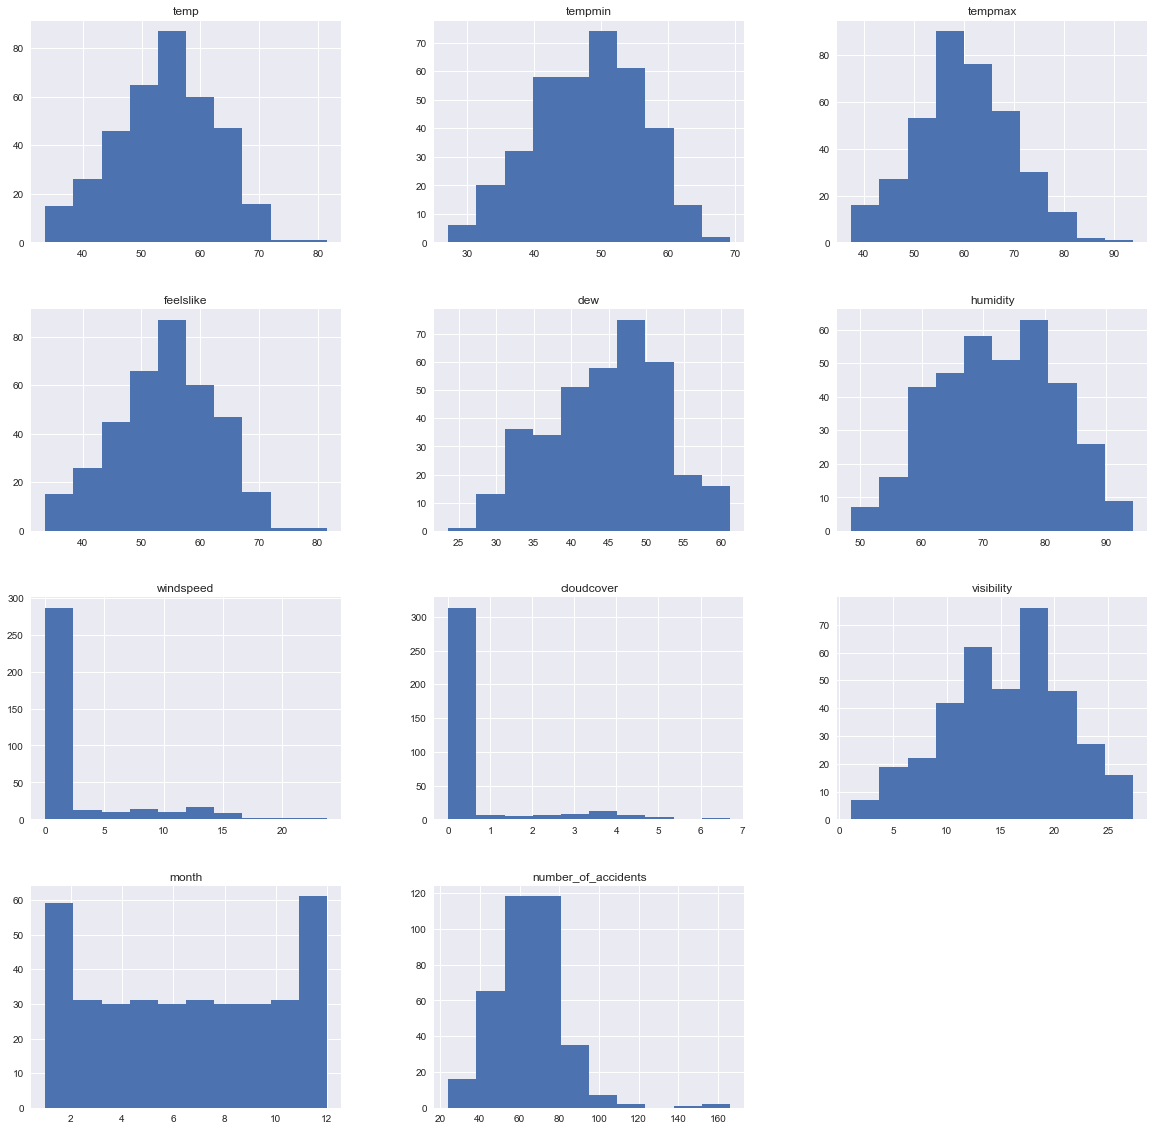

In [61]:
plt.figure()
dategrouped.hist(figsize=(20,20));

*Build correlation matrix table. As a result we don't see a strong correlation of number of accidents with other variables**

<AxesSubplot:>

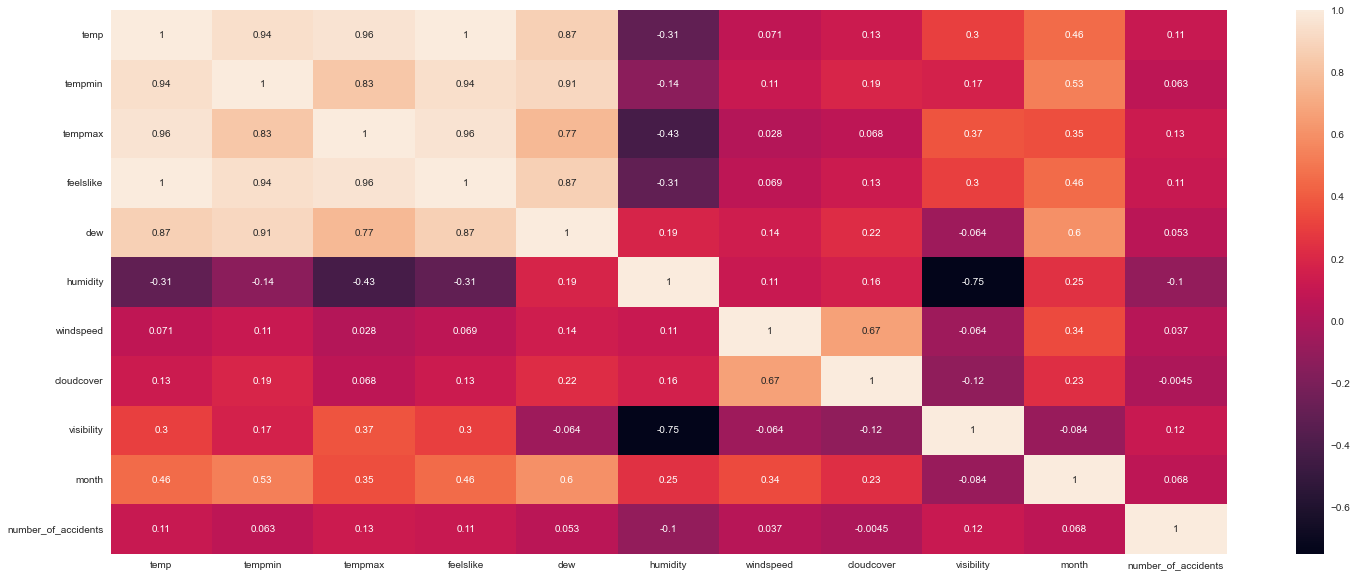

In [62]:
dategrouped_corr = dategrouped.corr()
plt.figure(figsize=(25,10))
sns.heatmap(dategrouped_corr, annot=True)

##  Answering analytical questions

### Q3: What are the patterns between number of accidents and weather conditions?

**Build interactive plots with Bokeh**

In [63]:
import bokeh
from bokeh.io import show, output_notebook
from bokeh.plotting import figure, ColumnDataSource
from bokeh.models import HoverTool
output_notebook()

Loading BokehJS ...

**Look at how the number of accidents changes with daily temperature by season. On the chart all days are shown by one circle. Circles are colored based on the season. Please click on the legend entries to hide the corresponding lines**

In [64]:
p = figure( plot_width=600, plot_height=400)
p.title.text = 'Click on legend entries to hide the corresponding lines'


p.scatter(x= dategrouped[dategrouped['season']=='Summer']['number_of_accidents'],
           y=dategrouped[dategrouped['season']=='Summer']['temp'],
          color='lime', alpha=0.8, legend_label='Summer',
          muted_color='lime', muted_alpha=0.2,
          marker='circle', size=15)
p.scatter(x= dategrouped[dategrouped['season']=='Winter']['number_of_accidents'],
           y=dategrouped[dategrouped['season']=='Winter']['temp'],
          color='blue', alpha=0.8, legend_label='Winter',
          muted_color='blue', muted_alpha=0.2,
         marker='circle', size=15)
p.scatter(x= dategrouped[dategrouped['season']=='Spring']['number_of_accidents'],
           y=dategrouped[dategrouped['season']=='Spring']['temp'],
          color='pink', alpha=0.8, legend_label='Spring',
          muted_color='pink', muted_alpha=0.2,
          marker='circle', size=15)
p.scatter(x= dategrouped[dategrouped['season']=='Fall']['number_of_accidents'],
           y=dategrouped[dategrouped['season']=='Fall']['temp'],
          color='yellow', alpha=0.8, legend_label='Autumn',
          muted_color='yellow', muted_alpha=0.2,
         marker='circle', size=15)



p.legend.location = "top_right"
p.legend.click_policy="mute"

show(p)

There is nothing to conclude from the plot above, no clear association between number of accidents and temperature comparing it by season

**Let's also look at how the number of accidents changes with daily visibility by season. On the chart all days are shown by one circle. Circles are colored based on the season. Please click on the legend entries to hide the corresponding lines.**

In [65]:
p = figure( plot_width=600, plot_height=400)
p.title.text = 'Click on legend entries to hide the corresponding lines'


p.scatter(x= dategrouped[dategrouped['season']=='Summer']['number_of_accidents'],
           y=dategrouped[dategrouped['season']=='Summer']['visibility'],
          color='lime', alpha=0.8, legend_label='Summer',
          muted_color='lime', muted_alpha=0.2,
          marker='circle', size=15)
p.scatter(x= dategrouped[dategrouped['season']=='Winter']['number_of_accidents'],
           y=dategrouped[dategrouped['season']=='Winter']['visibility'],
          color='blue', alpha=0.8, legend_label='Winter',
          muted_color='blue', muted_alpha=0.2,
         marker='circle', size=15)
p.scatter(x= dategrouped[dategrouped['season']=='Spring']['number_of_accidents'],
           y=dategrouped[dategrouped['season']=='Spring']['visibility'],
          color='pink', alpha=0.8, legend_label='Spring',
          muted_color='pink', muted_alpha=0.2,
          marker='circle', size=15)
p.scatter(x= dategrouped[dategrouped['season']=='Fall']['number_of_accidents'],
           y=dategrouped[dategrouped['season']=='Fall']['visibility'],
          color='yellow', alpha=0.8, legend_label='Autumn',
          muted_color='yellow', muted_alpha=0.2,
         marker='circle', size=15)



p.legend.location = "top_right"
p.legend.click_policy="mute"

show(p)

There is nothing to conclude from the plot above, no clear association between number of accidents and visibility comparing it by season.

**Further, let's check at trends of variables:**

**1) Average number of accidents and temp**

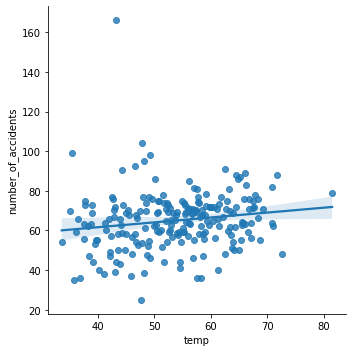

In [126]:
plot = dategrouped.groupby(["temp"]).mean("number_of_accidents").reset_index()
sns.lmplot(data=plot, x="temp", y="number_of_accidents")

From the plot above it can be noticed a positive relationship between number of accidents and temperature. So the number of accidents increases with temperature.

**2) Average number of accidents and feelslike temp**

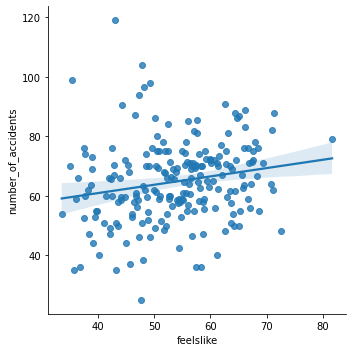

In [127]:
plot = dategrouped.groupby(["feelslike"]).mean("number_of_accidents").reset_index()
sns.lmplot(data=plot, x="feelslike", y="number_of_accidents")

From the plot above it can be noticed a same relationship between number of accidents and feelslike as with  temperature. 

**3) Windspeed and number of accidents**

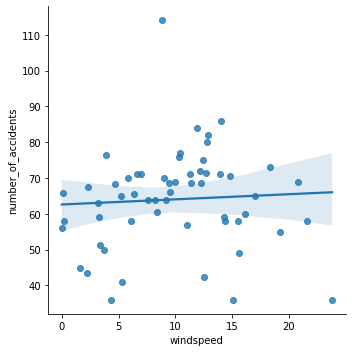

In [151]:
plot = dategrouped.groupby(["windspeed"]).mean("number_of_accidents").reset_index()
sns.lmplot(data=plot, x="windspeed", y="number_of_accidents")

We expected that with higher windspeed there are more accidents, but plot doesn't show such relationship.

**4) Visibility and number of accidents**

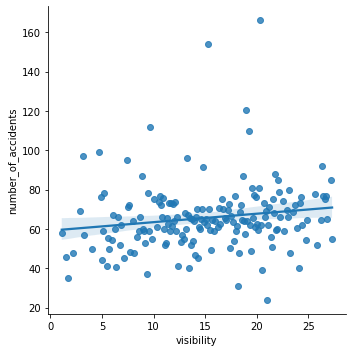

In [152]:
plot = dategrouped.groupby(["visibility"]).mean("number_of_accidents").reset_index()
sns.lmplot(data=plot, x="visibility", y="number_of_accidents")

From the plot above we can see a positive pattern between number of accidents and visibility.

**5) Cloudcover and number of accidents**

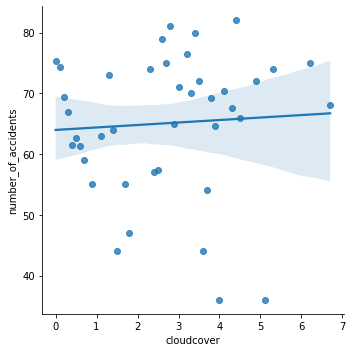

In [153]:
plot = dategrouped.groupby(["cloudcover"]).mean("number_of_accidents").reset_index()
sns.lmplot(data=plot, x="cloudcover", y="number_of_accidents")

## Conclusion

To conclude, we found out how number of accidents differs for various environmental conditions such as road type, light condtions, weather conditions. It was observed that for all types of accident severity most of the accidents happened according to the road contions on single carriageway road type, according to the light conditions during the daylight, and according to the weather conditions during the fine with no high winds days. We also checked how number of accidents differs with age. Most accidents happened with those from 17 to 30 years old. It was also obserbed that number of fatal accidents is becoming less with age. So people become more careful on wet roads after almost 40 years old. Checking the relationship between weather conditions, such as temperature, cloucover, visibility and windspeed with number of accidents we couldn't observe strong trend.